# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks if needed.

Group Number: 03

Group Members:
- Favian Izza Diasputra (18222070)
- Ervina Limka (18222100)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.preprocessing import LabelEncoder

## Import Dataset

In [2]:
# Read File
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
# df = pd.read_csv('https://drive.google.com/1q8FJa_HN74Nyjme_tpUFJ1ncQiPg1ffI')

# df = pd.read_csv('https://drive.google.com/uc?id=1thHVhP-KClx4K4JxO_ctokR7P14DxOOB')

pd.options.display.float_format = '{:,.2f}'.format
df.head()

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0              100.00                  1.00               0.52  ...    0   
1              100.00                  0.67               0.03  ...    0   
2              100.00                  0.87               0.03  ...    0   
3              100.00                  1.00               0.52  ...    1   
4              100.00                  1.00               0.08  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

#### 1. The size of the data (instances and features)

In [3]:
print(f"Size of the data: {df.shape} \n")

Size of the data: (235795, 56) 



#### 2. The data types of each feature.

In [4]:
print(f"Data types of each feature: ")
df.dtypes.to_frame('Data-Type').rename_axis('Feature').reset_index()

Data types of each feature: 


Feature Data-Type
0                     FILENAME    object
1                          URL    object
2                    URLLength     int64
3                       Domain    object
4                 DomainLength     int64
5                   IsDomainIP     int64
6                          TLD    object
7           URLSimilarityIndex   float64
8         CharContinuationRate   float64
9            TLDLegitimateProb   float64
10                 URLCharProb   float64
11                   TLDLength     int64
12               NoOfSubDomain     int64
13              HasObfuscation     int64
14          NoOfObfuscatedChar     int64
15            ObfuscationRatio   float64
16            NoOfLettersInURL     int64
17            LetterRatioInURL   float64
18             NoOfDegitsInURL     int64
19             DegitRatioInURL   float64
20             NoOfEqualsInURL     int64
21              NoOfQMarkInURL     int64
22          NoOfAmpersandInURL     int64
23  NoOfOtherSpecialCharsInURL     int64
24       SpacialCharRatioInURL   float64
25                     IsHTTPS     int64
26                  LineOfCode     int64
27           LargestLineLength     int64
28                    HasTitle     int64
29                       Title    object
30       DomainTitleMatchScore   float64
31          URLTitleMatchScore   float64
32                  HasFavicon     int64
33                      Robots     int64
34                IsResponsive     int64
35             NoOfURLRedirect     int64
36            NoOfSelfRedirect     int64
37              HasDescription     int64
38                   NoOfPopup     int64
39                  NoOfiFrame     int64
40       HasExternalFormSubmit     int64
41                HasSocialNet     int64
42             HasSubmitButton     int64
43             HasHiddenFields     int64
44            HasPasswordField     int64
45                        Bank     int64
46                         Pay     int64
47                      Crypto     int64
48            HasCopyrightInfo     int64
49                   NoOfImage     int64
50                     NoOfCSS     int64
51                      NoOfJS     int64
52                 NoOfSelfRef     int64
53                NoOfEmptyRef     int64
54             NoOfExternalRef     int64
55                       label     int64

#### 3. The number of unique values for categorical features.

In [5]:
binary_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if df[col].nunique() == 2]
categorical_columns = list(df.select_dtypes(include=['object']).columns) + binary_columns

unique_values_df = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Values': [df[col].nunique() for col in categorical_columns]
})

# Displaying with custom formatting
display(unique_values_df.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .hide(axis="index"))

#### 4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
binary_columns = [col for col in numeric_columns if df[col].nunique() == 2]
continuous_columns = [col for col in numeric_columns if col not in binary_columns and col != 'id']
descriptive_stats = df[continuous_columns].describe().T[['min', 'max', 'mean', '50%', 'std']].rename(columns={'50%': 'median'}).round(1)
descriptive_stats = descriptive_stats.rename(columns={'min': 'Min', 'max': 'Max', 'mean': 'Mean', 'median': 'Median', 'std': 'Std'})
descriptive_stats['Column'] = descriptive_stats.index
descriptive_stats = descriptive_stats[['Column', 'Min', 'Max', 'Mean', 'Median', 'Std']]

# Displaying with custom formatting
display(descriptive_stats.style.format("{:.1f}", subset=['Min', 'Max', 'Mean', 'Median', 'Std'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .hide(axis="index"))

##### Categorization for categorical features.

In [7]:
TLD_CATEGORIES = {
    "Country Code TLDs": ['au', 'us', 'uk', 'id', 'ca', 'de', 'fr', 'pl', 'ru', 'il', 'co', 'fi', 'ke', 'io', 'se', 'in', 'vn', 'ua', 'cz', 'nl', 'sk', 'ph', 'tw', 'br', 'fo', 'at', 'tz', 'th', 'bz', 'np', 'ge', 'ec', 'cn', 'ie', 'pk', 'mx', 'lv', 'dk', 'ch', 'nz', 'az', 'ro', 'ga', 'ar', 'pe', 'hr', 'kz', 'tv', 'sg', 'ky', 'bd', 'bm', 'pg', 'hk', 'si', 'cy', 'me', 'ua', 'qa', 'am', 'mk', 'bj'],
    "Generic TLDs": ['com', 'org', 'net', 'edu', 'gov', 'info', 'co', 'work', 'site', 'app', 'io', 'se', 'dev', 'vn', 'ph', 'tw', 'br', 'xyz', 'link', 'live', 'lv', 'news', 'top', 'store', 'asia', 'shop', 'design', 'online', 'mobi', 'chat', 'global', 'travel', 'google', 'world', 'art', 'works', 'company', 'bio', 'zone'],
    "Industry-Specific TLDs": ['tech', 'ai', 'design', 'art', 'media', 'finance', 'eco', 'digital', 'music', 'sports', 'game', 'cloud', 'health', 'movie', 'school', 'education', 'food', 'travel', 'fashion'],
    "Gov & Org TLDs": ['gov', 'mil', 'ngo', 'museum', 'foundation', 'institute', 'church', 'faith', 'edu'],
    "Activity TLDs": ['jobs', 'news', 'club', 'fitness', 'party', 'school', 'health', 'games'],
    "Geo TLDs": ['city', 'london', 'nyc', 'berlin', 'paris', 'tokyo'],
    "Unique TLDs": ['tv', 'fm', 'me', 'im', 'name', 'tv', 'eu', 'bz', 'fm', 'tv', 'site']
}

def categorize_filename(filename):
    if isinstance(filename, str):
        try:
            filename_int = int(filename.replace('.txt', ''))
            if filename_int < 10000:
                return '<10000.txt'
            elif filename_int < 100000:
                return '<100000.txt'
            elif filename_int < 1000000:
                return '<1000000.txt'
            else:
                return '>=1000000.txt'
        except ValueError:
            return 'Non-Numeric.txt'
    else:
        return 'Non-Numeric.txt'

def categorize_tld(domain):
    if isinstance(domain, str):
        tld = domain.split('.')[-1]
        for category, tlds in TLD_CATEGORIES.items():
            if tld in tlds:
                return category
    return "Other"

def categorize_url(label):
    return 'URL Phishing' if label == 0 else 'URL Legitimate'

def categorize_title(title):
    if pd.isna(title):
        return 'NaN'
    elif title[0].isalpha():
        return f"Starts with {title[0].upper()}"
    elif title[0].isdigit():
        return 'Starts with Number'
    else:
        return 'Other'

def update_counts_for_categorized_columns(df, categorical_columns):
    column_counts = {}
    pair_counts = {}  # Dictionary to store counts of categorical_column values paired with label values

    for col in categorical_columns:
        if col == "FILENAME":
            filename_counts = df['FILENAME'].apply(categorize_filename).value_counts()
            column_counts[col] = filename_counts

            # Count occurrences of each FILENAME category with each label
            pair_count = df.groupby(['label', df['FILENAME'].apply(categorize_filename)]).size()
            pair_counts[col] = pair_count.unstack(fill_value=0)

        elif col == "URL":
            url_counts = df['label'].apply(categorize_url).value_counts()
            column_counts[col] = url_counts

            # Count occurrences of each URL category with each label
            pair_count = df.groupby(['label', df['label'].apply(categorize_url)]).size()
            pair_counts[col] = pair_count.unstack(fill_value=0)

        elif col in ["Domain", "TLD"]:
            tld_counts = df[col].apply(categorize_tld).value_counts()
            column_counts[col] = tld_counts

            # Count occurrences of each TLD category with each label
            pair_count = df.groupby(['label', df[col].apply(categorize_tld)]).size()
            pair_counts[col] = pair_count.unstack(fill_value=0)

        elif col == "Title":
            title_counts = df['Title'].apply(categorize_title).value_counts()
            column_counts[col] = title_counts

            # Count occurrences of each Title category with each label
            pair_count = df.groupby(['label', df['Title'].apply(categorize_title)]).size()
            pair_counts[col] = pair_count.unstack(fill_value=0)
        else:
            other_counts = df[col].value_counts()
            column_counts[col] = other_counts

            # Count occurrences of each value in other categorical columns with each label
            pair_count = df.groupby(['label', df[col]]).size()
            pair_counts[col] = pair_count.unstack(fill_value=0)

    return column_counts, pair_counts

# Example usage
column_counts, pair_counts = update_counts_for_categorized_columns(df, categorical_columns)

def plot_column_distribution(df, col):
    if col == "FILENAME":
        sns.countplot(x=df['FILENAME'].apply(categorize_filename), order=df['FILENAME'].apply(categorize_filename).value_counts().index)
        plt.title('Distribution of FILENAME (Categorized by Numeric Ranges)')
    elif col == "URL":
        sns.countplot(x=df['label'].apply(categorize_url), order=df['label'].apply(categorize_url).value_counts().index)
        plt.title('Distribution of URL (Categorized by Phishing vs Legitimate)')
    elif col in ["Domain", "TLD"]:
        sns.countplot(x=df[col].apply(categorize_tld), order=df[col].apply(categorize_tld).value_counts().index)
        plt.title(f'Distribution of {col}s by TLD Category')
    elif col == "Title":
        sns.countplot(x=df['Title'].apply(categorize_title), order=df['Title'].apply(categorize_title).value_counts().index)
        plt.title('Distribution of Title (Categorized by First Character)')
    else:
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col} (Categorical Feature)')


In [8]:
print(column_counts )

{'FILENAME': <1000000.txt       113020
>=1000000.txt       55211
Non-Numeric.txt     45734
<100000.txt         20529
<10000.txt           1301
Name: FILENAME, dtype: int64, 'URL': URL Legitimate    134850
URL Phishing      100945
Name: label, dtype: int64, 'Domain': Generic TLDs              160552
Country Code TLDs          50937
Other                      21546
Unique TLDs                 1127
Industry-Specific TLDs       681
Activity TLDs                550
Gov & Org TLDs               334
Geo TLDs                      68
Name: Domain, dtype: int64, 'TLD': Generic TLDs              160552
Country Code TLDs          50937
Other                      21546
Unique TLDs                 1127
Industry-Specific TLDs       681
Activity TLDs                550
Gov & Org TLDs               334
Geo TLDs                      68
Name: TLD, dtype: int64, 'Title': Starts with Number    36611
Starts with S         18402
Starts with A         17291
Starts with M         15068
Starts with C         13

#### 5. Explain the significance of gathering the first four pieces of information.


Tujuan dari mengumpulkan informasi tentang ukuran data (instansi
dan fitur) adalah untuk memahami sejauh mana data yang tersedia
dapat mewakili masalah yang ingin diselesaikan. Selain itu, mengetahui tipe data dari setiap fitur yang ada dapat membantu dalam memilih teknik analisis yang tepat. Jumlah nilai unik untuk fitur kategorikal memberikan wawasan tentang variabilitas data, sedangkan nilai minimum, maksimum, rata-rata, median, dan standar deviasi untuk fitur non-kategorikal memungkinkan untuk menilai distribusi data dan mendeteksi potensi outlier atau masalah kualitas lainnya.

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

#### 1. Missing values for each feature.

In [9]:
def missing_value(df):
    df = df.drop(columns=['id'], errors='ignore')
    sum_df = pd.concat([df.isna().sum().rename('Number_of_missing_values')], axis=1).fillna('-')
    sum_df = sum_df.reset_index().rename(columns={'index': 'Column'})

    # Displaying with custom styling
    return sum_df.style.set_properties(**{'text-align': 'center'}) \
                        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
                        .hide(axis="index")

display(missing_value(df))

#### 2. Outliers for each feature (use the methods you are familiar with).

In [10]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
outlier_info = {}

for col in numeric:
    if col == 'id': continue
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        'Jumlah Outlier': len(outliers),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers.index.tolist()[:10] if not outliers.empty else '-'
    }

outlier_df = pd.DataFrame(outlier_info).T
outlier_df['Persentase Outlier (%)'] = (outlier_df['Jumlah Outlier'] / df.shape[0]) * 100
outlier_df['Column'] = outlier_df.index
outlier_df = outlier_df[['Column', 'Jumlah Outlier', 'Lower Bound', 'Upper Bound', 'Outliers', 'Persentase Outlier (%)']]

outlier_df['Lower Bound'] = outlier_df['Lower Bound'].map(lambda x: f'{x:.2f}')
outlier_df['Upper Bound'] = outlier_df['Upper Bound'].map(lambda x: f'{x:.2f}')
outlier_df['Persentase Outlier (%)'] = outlier_df['Persentase Outlier (%)'].map(lambda x: f'{x:.2f}')

# Displaying with custom formatting
display(outlier_df.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .hide(axis="index"))

#### 3. Why is it necessary to identify missing values and outliers?

Identifikasi missing values dan outliers merupakan hal yang wajib dilakukan untuk analisis data sebelum dilakukan pemodelan karena beberapa alasan sebagai berikut.
- Missing value dapat mempengaruhi **kualitas data** yang menyebabkan hasil menjadi bias. Selain itu, missing value juga dapat **merusak integritas data** sehingga sulit untuk menarik insight dari data.
- Outlier dapat dapat **mempengaruhi estimasi statistik** karena distribusi data yang terlalu berbeda sehingga sulit untuk mengidentifikasi pola yang dapat mengarah pada **kesimpulan yang salah**.

Kedua hal ini dapat **menurunkan kualitas data** dan **mempengaruhi akurasi prediksi model** sehingga perlu ditangani dengan tepat sebelum analisis lebih lanjut dilakukan.

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

#### 1. Correlations between features.

C:\Users\FAVIAN\AppData\Local\Temp\ipykernel_14708\931433569.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


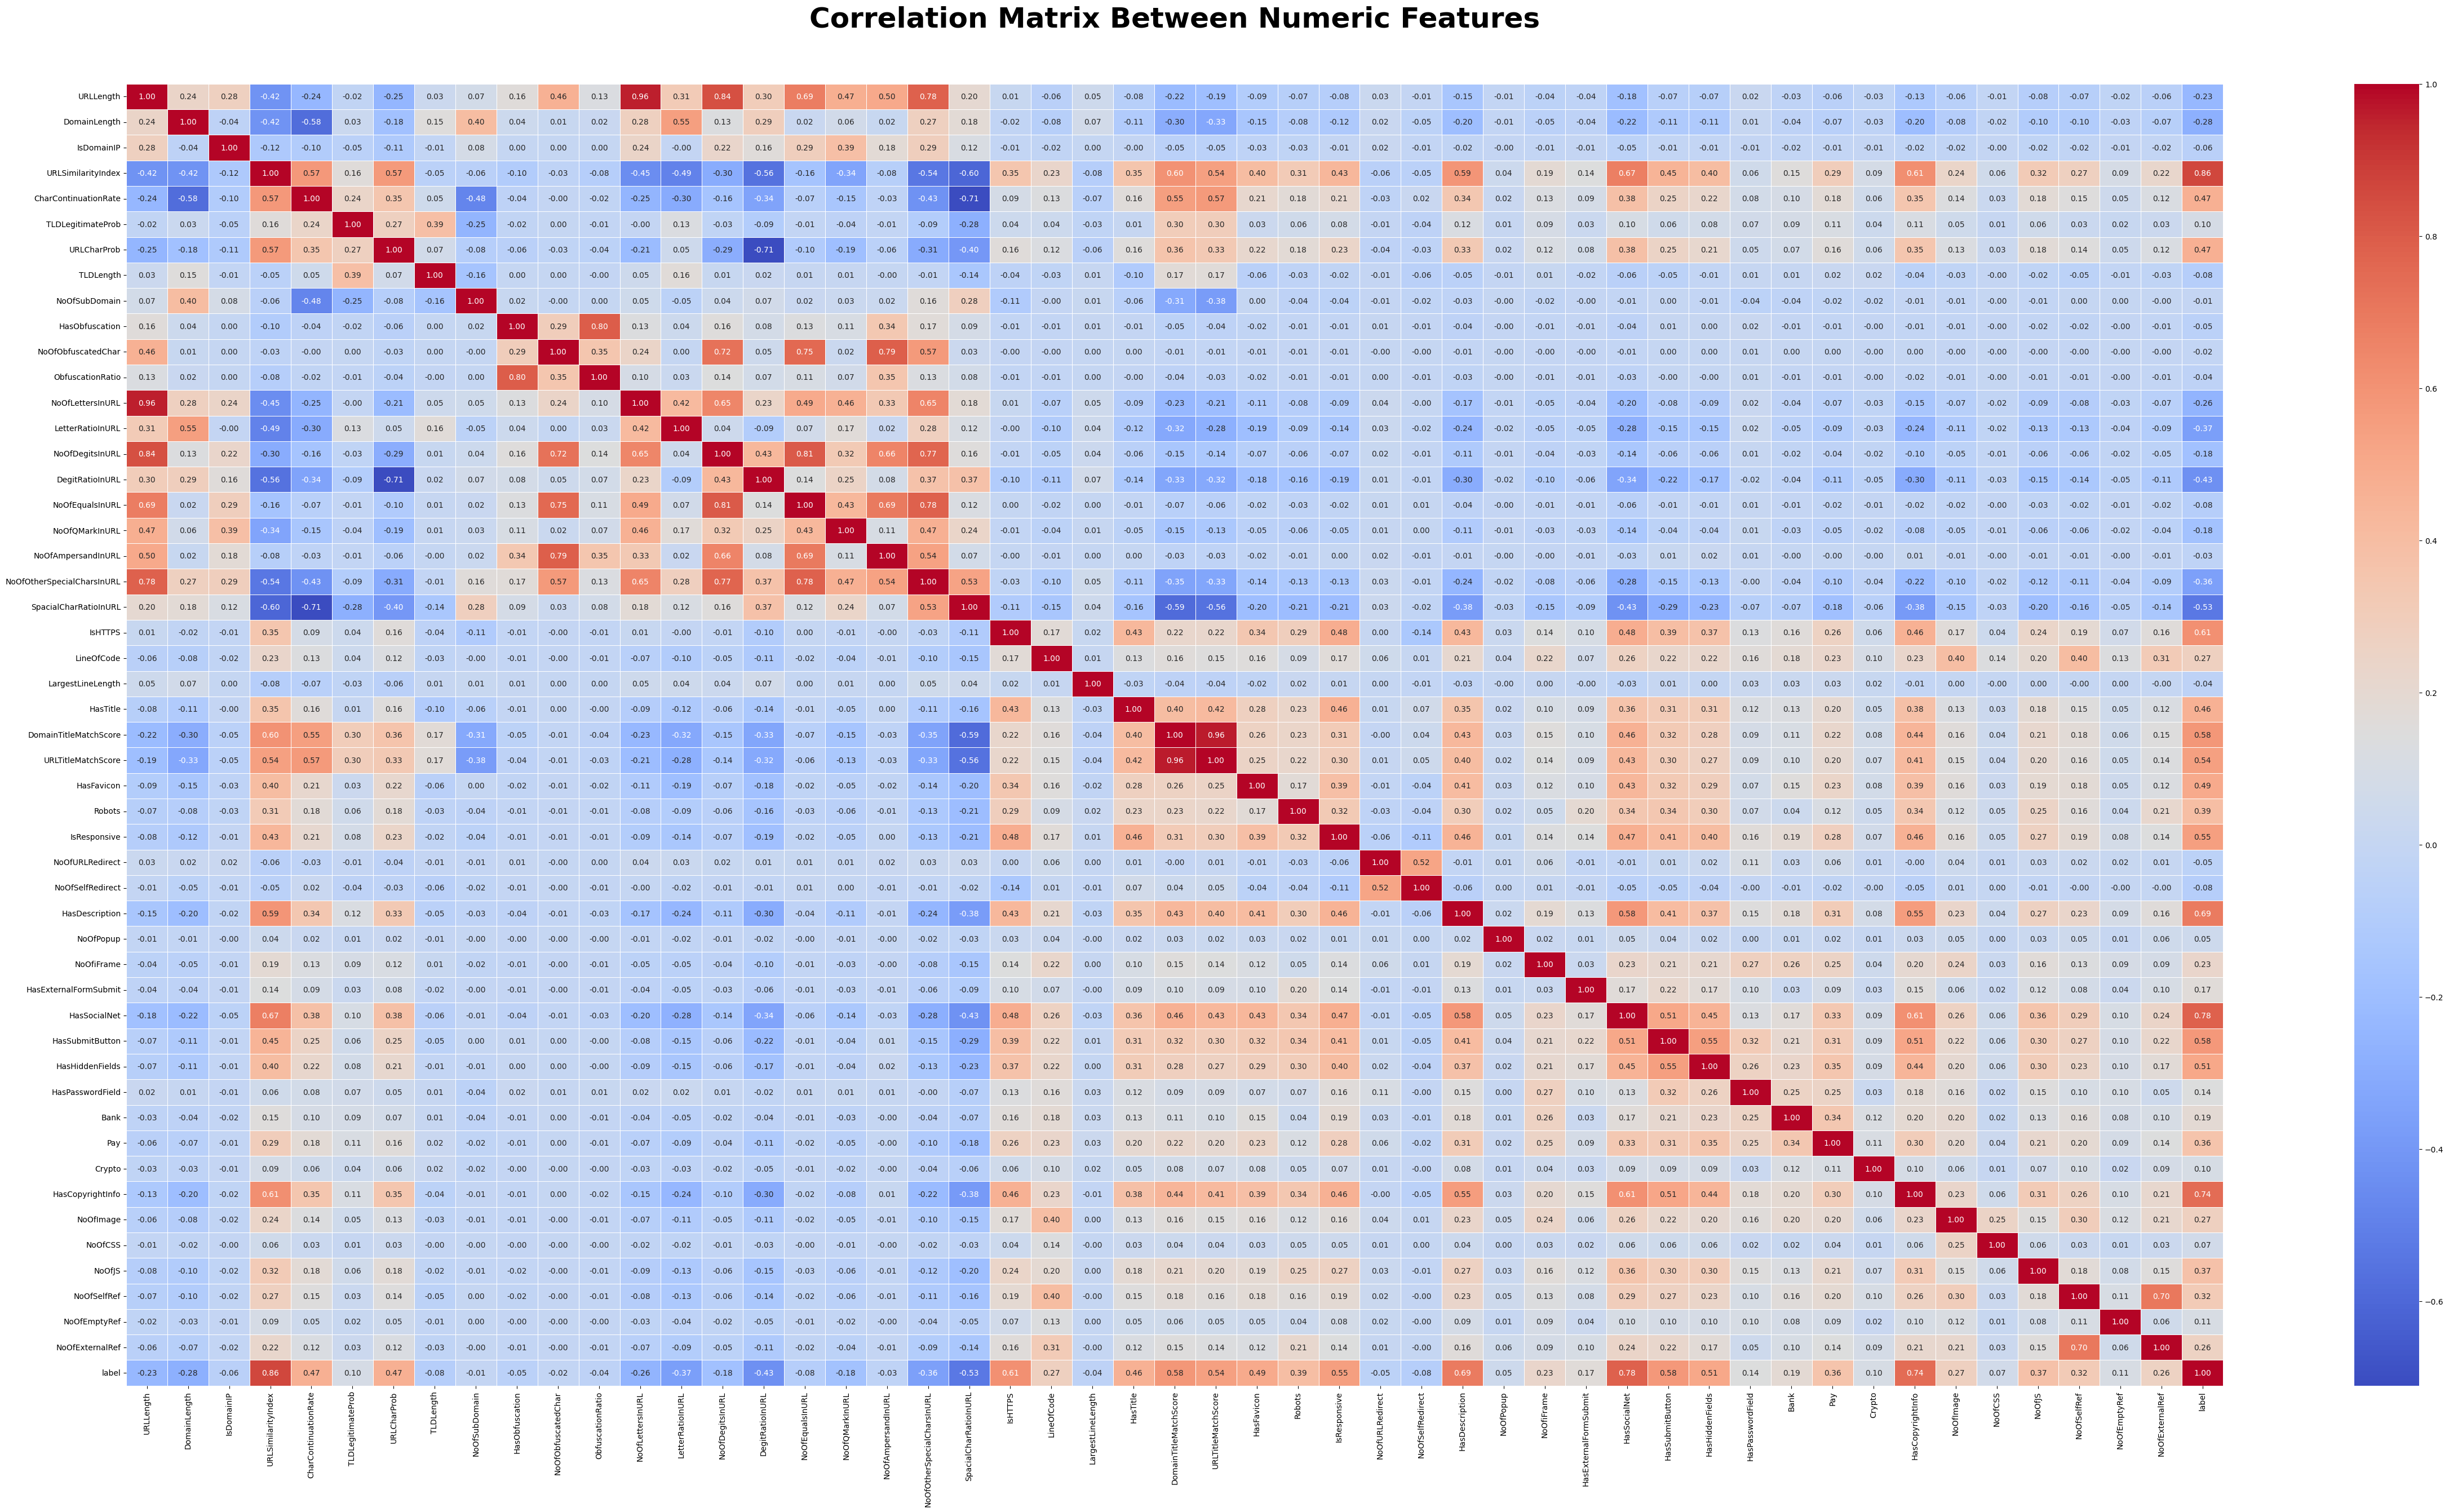

C:\Users\FAVIAN\AppData\Local\Temp\ipykernel_14708\931433569.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Correlations (|corr| > 0.5):
URLLength, correlates with:
  NoOfObfuscatedChar: 0.46
  NoOfLettersInURL: 0.96
  NoOfDegitsInURL: 0.84
  NoOfEqualsInURL: 0.69
  NoOfQMarkInURL: 0.47
  NoOfAmpersandInURL: 0.50
  NoOfOtherSpecialCharsInURL: 0.78
DomainLength, correlates with:
  CharContinuationRate: -0.58
  LetterRatioInURL: 0.55
URLSimilarityIndex, correlates with:
  CharContinuationRate: 0.57
  URLCharProb: 0.57
  LetterRatioInURL: -0.49
  DegitRatioInURL: -0.56
  NoOfOtherSpecialCharsInURL: -0.54
  SpacialCharRatioInURL: -0.60
  DomainTitleMatchScore: 0.60
  URLTitleMatchScore: 0.54
  HasDescription: 0.59
  HasSocialNet: 0.67
  HasCopyrightInfo: 0.61
  label: 0.86
CharContinuationRate, correlates with:
  DomainLength: -0.58
  URLSimilarityIndex: 0.57
  NoOfSubDomain: -0.48
  SpacialCharRatioInURL: -0.71
  DomainTitleMatchScore: 0.55
  URLTitleMatchScore: 0.57
  label: 0.47
URLCharProb, correlates with:
  URLSimilarityIndex: 0.57
  DegitRatioInURL: -0.71
  label: 0.47
NoOfSubDomain, corr

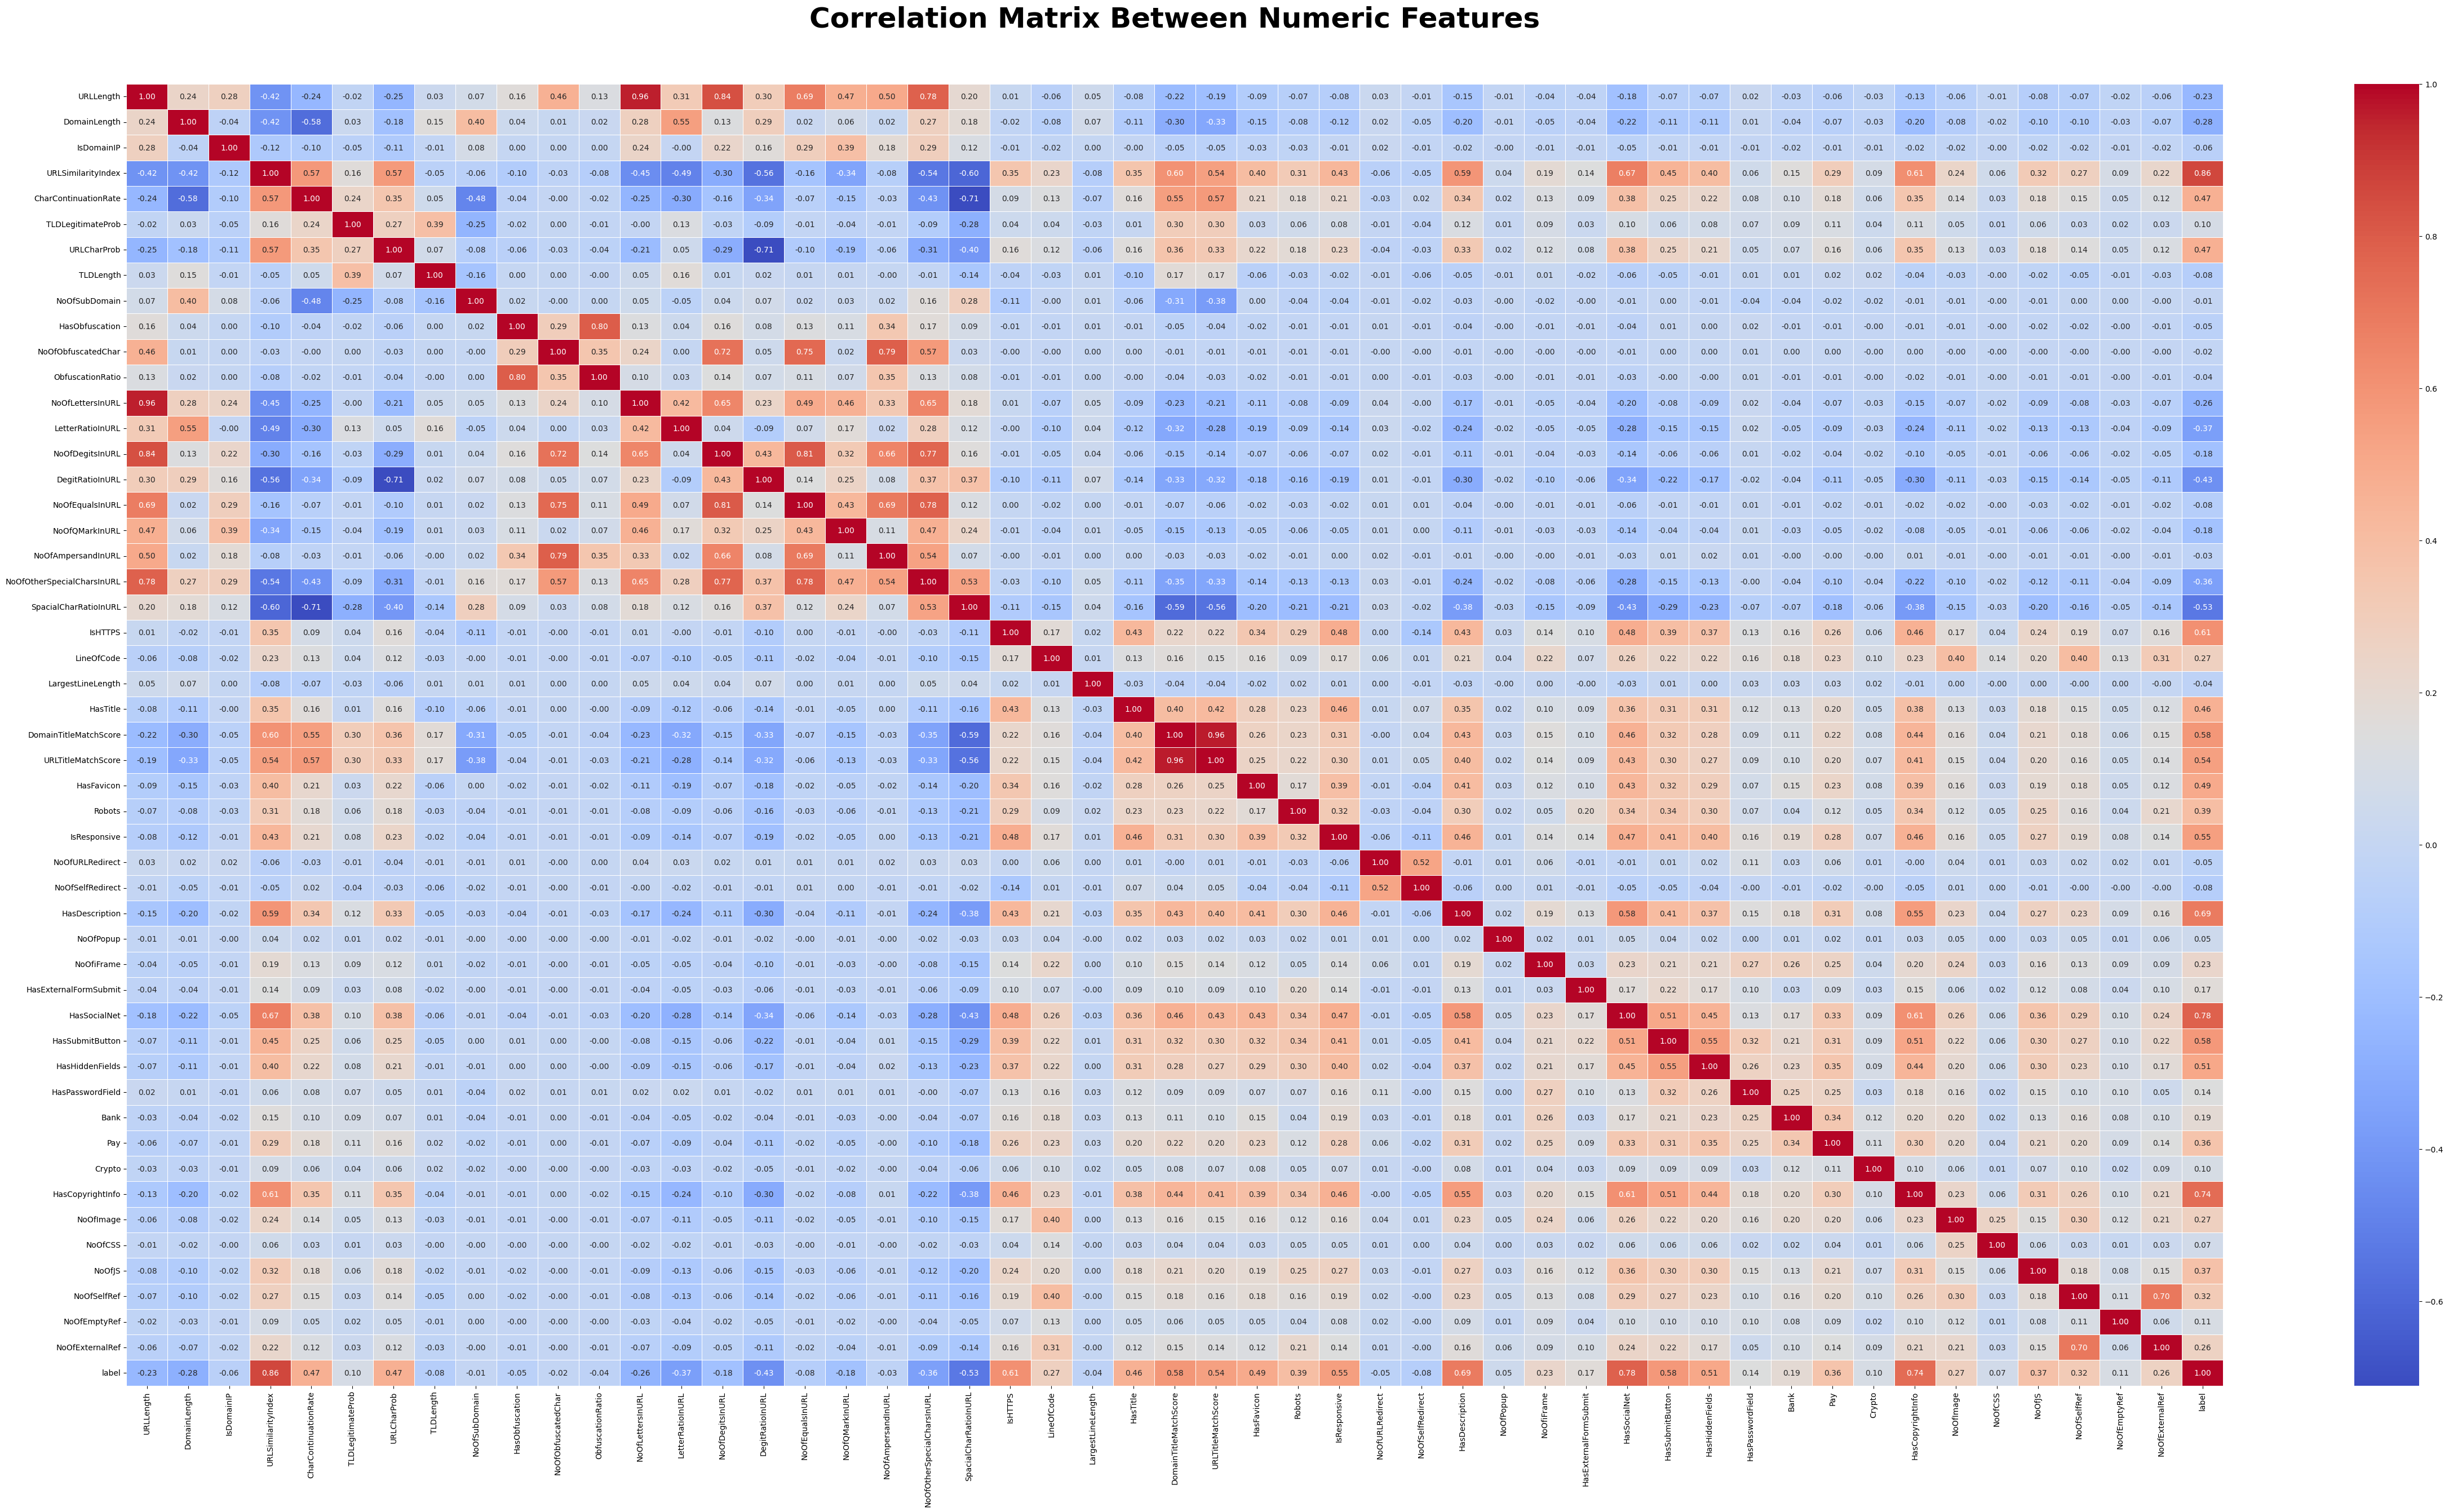

In [ ]:
def numeric_correlations(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(60, 30))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.text(x=0.5, y=1.05, s="Correlation Matrix Between Numeric Features", ha='center', va='center',
             fontsize=36, fontweight='bold', color='black', transform=plt.gca().transAxes)
    plt.show()

def numeric_correlationsX(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Print correlations above 0.45 or below -0.45
    print("Correlations (|corr| > 0.45):")
    for col in corr_matrix.columns:
        high_corr = corr_matrix[col][(corr_matrix[col] > 0.45) | (corr_matrix[col] < -0.45)].drop(labels=[col])
        if not high_corr.empty:
            print(f"{col}, correlates with:")
            for index, value in high_corr.items():
                print(f"  {index}: {value:.2f}")

    # Plot heatmap
    plt.figure(figsize=(60, 30))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.text(x=0.5, y=1.05, s="Correlation Matrix Between Numeric Features", ha='center', va='center',
             fontsize=36, fontweight='bold', color='black', transform=plt.gca().transAxes)
    plt.show()


numeric_correlations(df)
numeric_correlationsX(df)

#### 2. Visualize the distribution of each feature (categorical and continuous).

# FILENAME


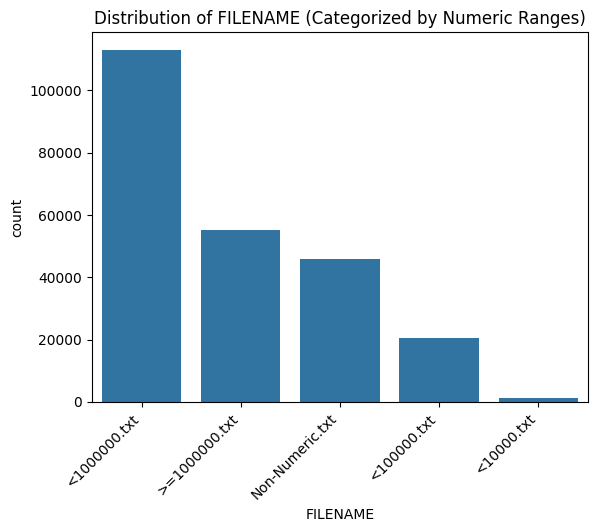

# URL


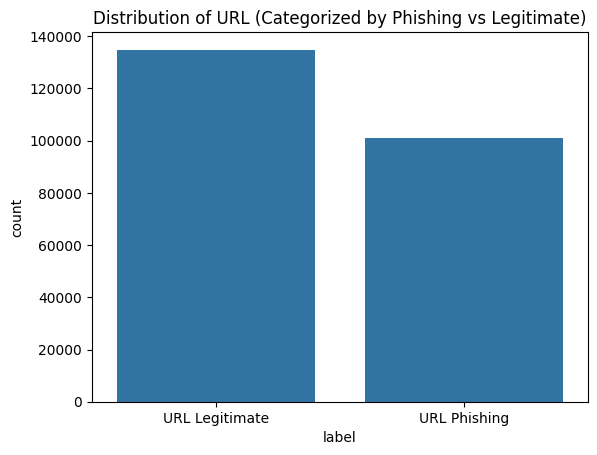

# URLLength


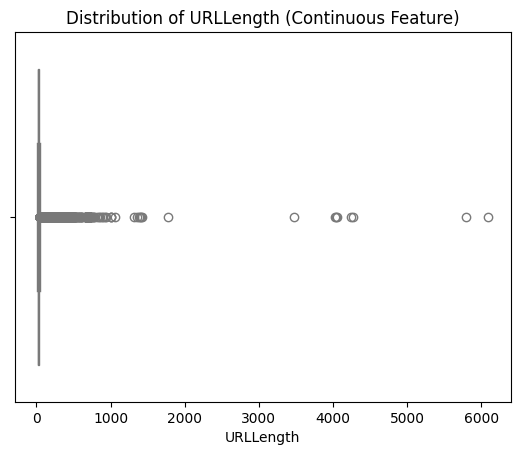

# Domain


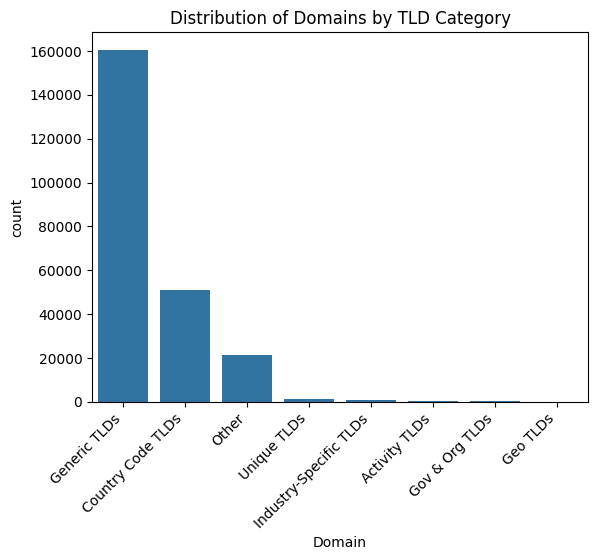

# DomainLength


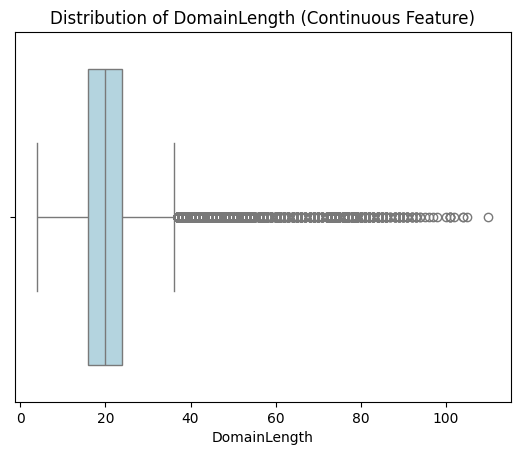

# IsDomainIP


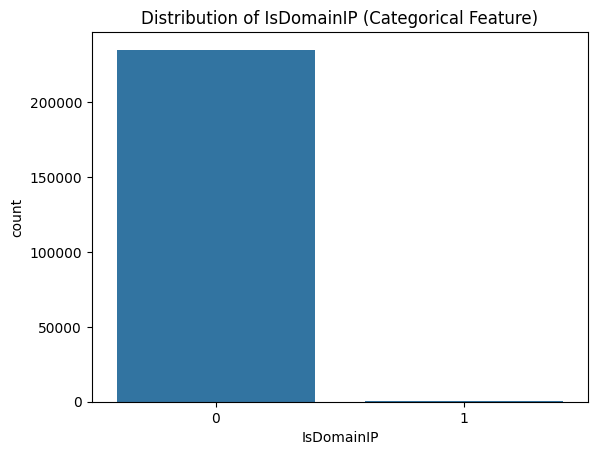

# TLD


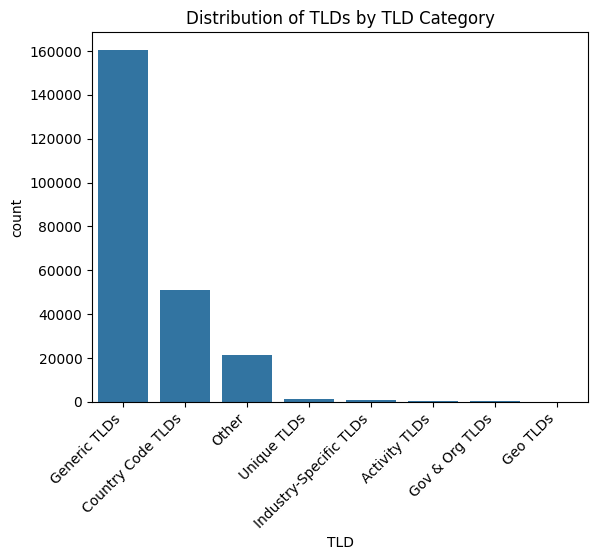

# URLSimilarityIndex


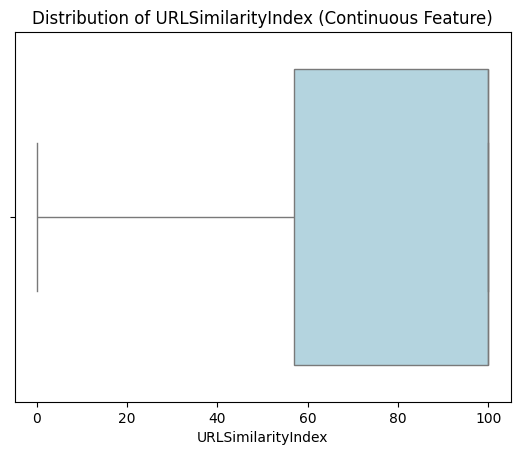

# CharContinuationRate


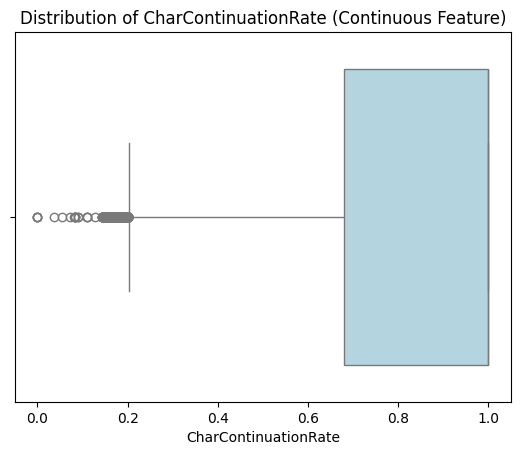

# TLDLegitimateProb


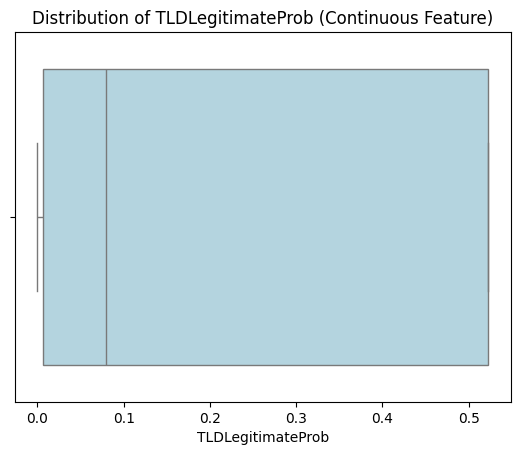

# URLCharProb


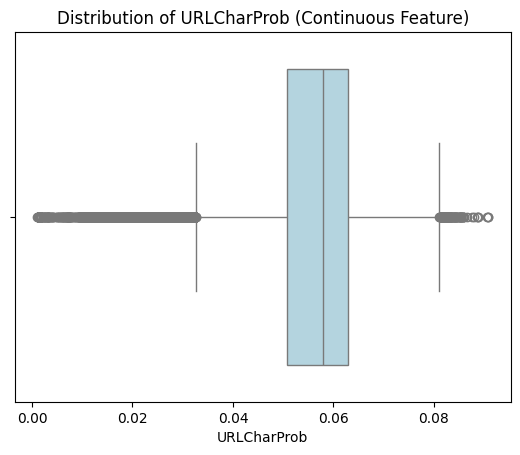

# TLDLength


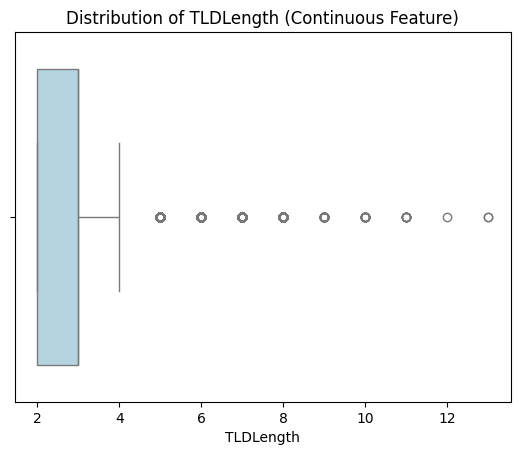

# NoOfSubDomain


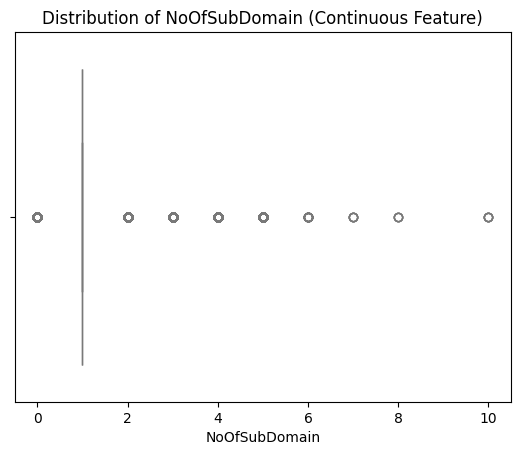

# HasObfuscation


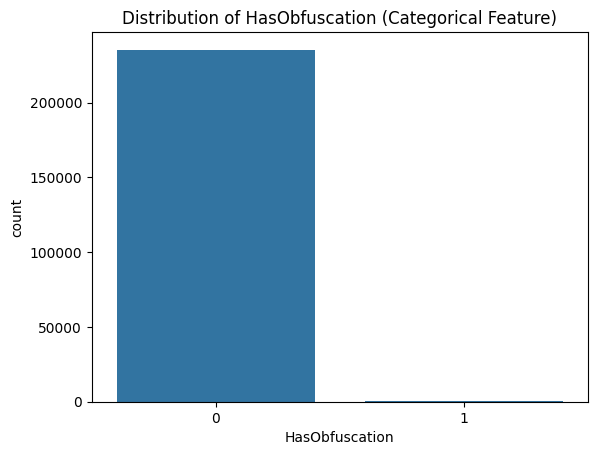

# NoOfObfuscatedChar


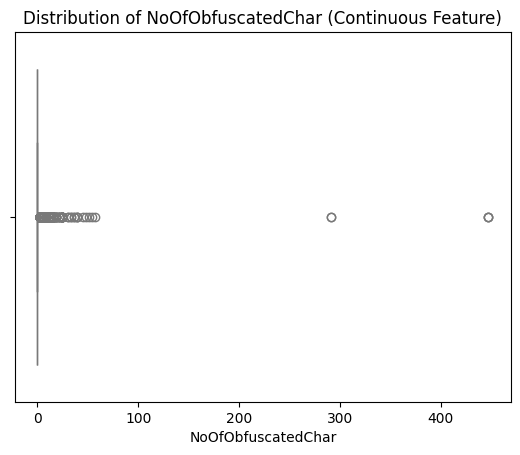

# ObfuscationRatio


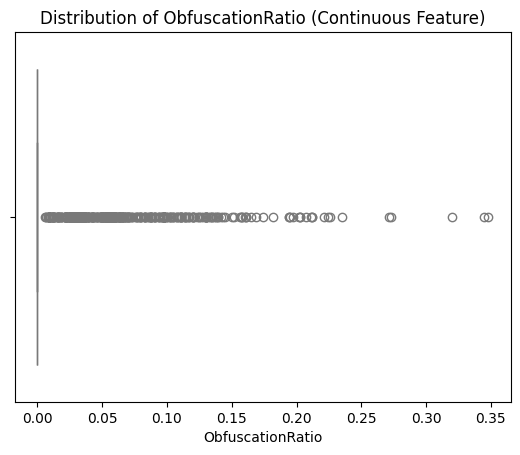

# NoOfLettersInURL


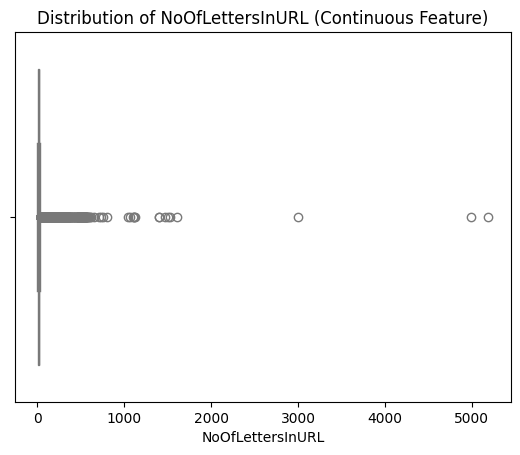

# LetterRatioInURL


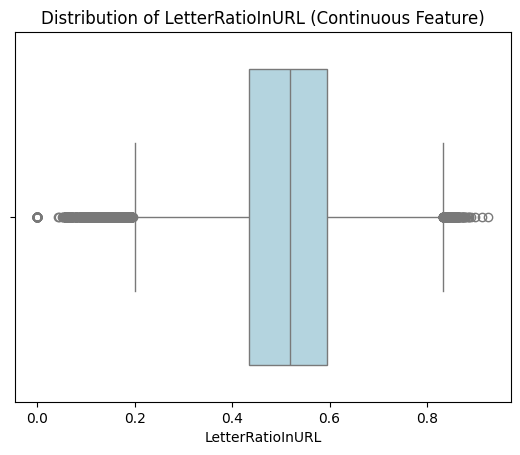

# NoOfDegitsInURL


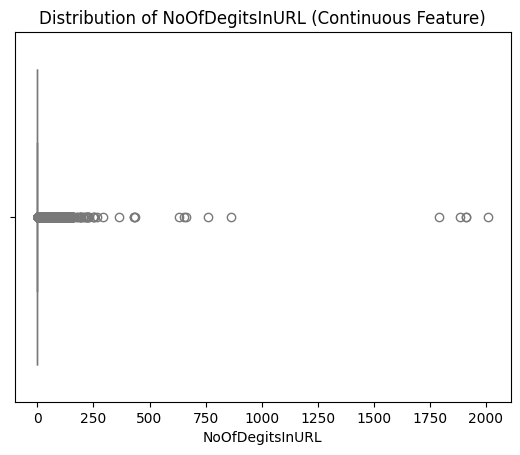

# DegitRatioInURL


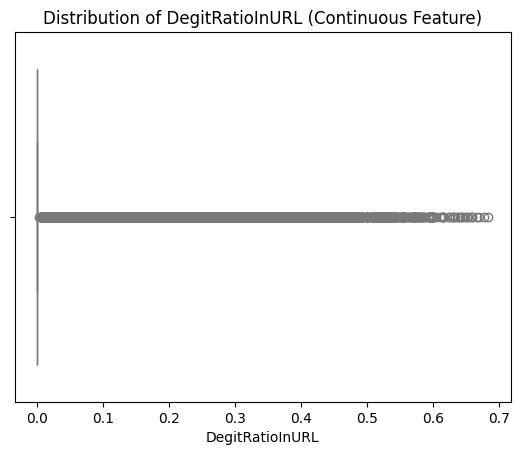

# NoOfEqualsInURL


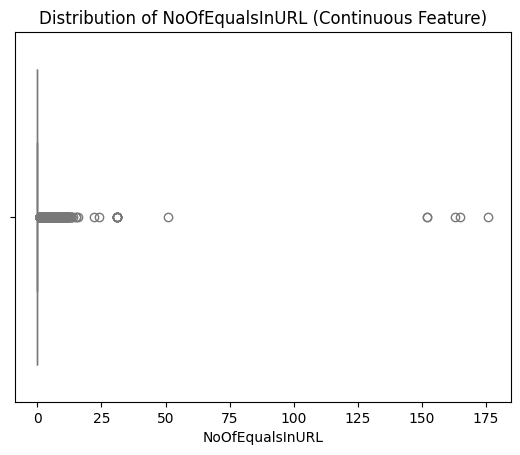

# NoOfQMarkInURL


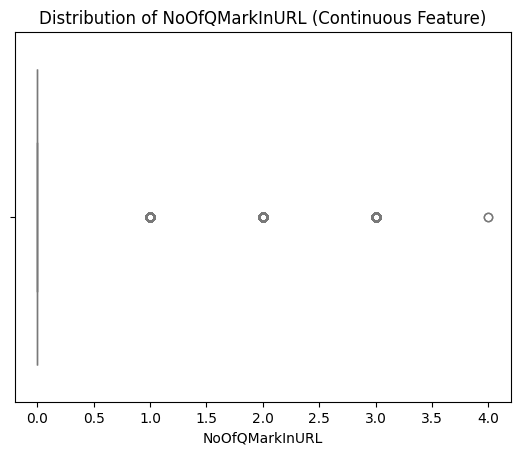

# NoOfAmpersandInURL


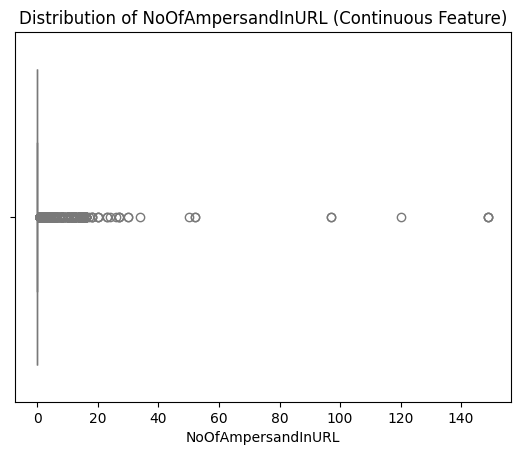

# NoOfOtherSpecialCharsInURL


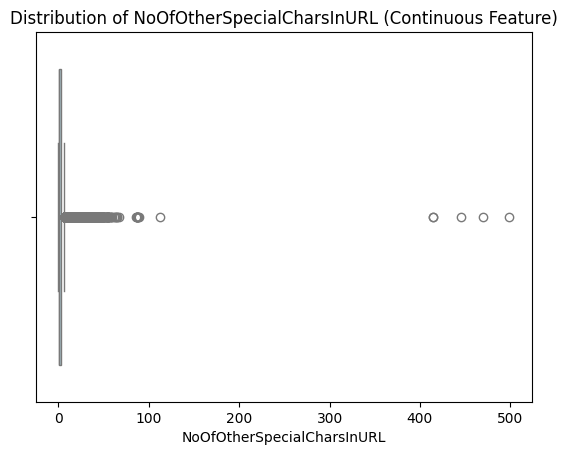

# SpacialCharRatioInURL


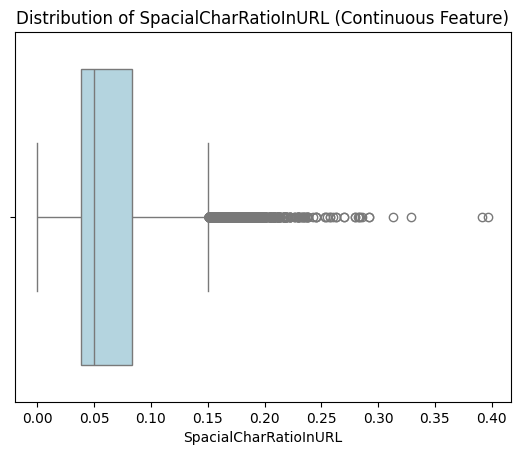

# IsHTTPS


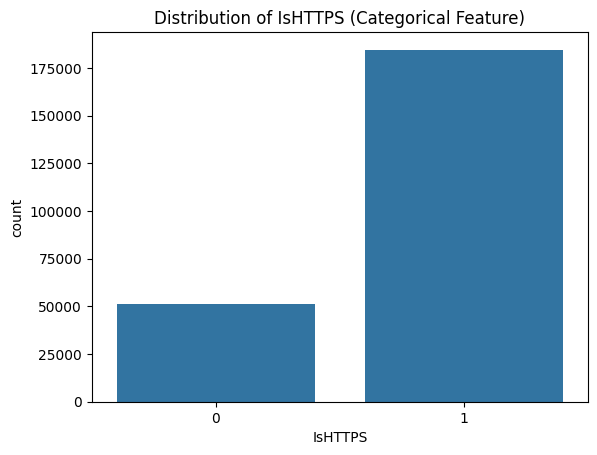

# LineOfCode


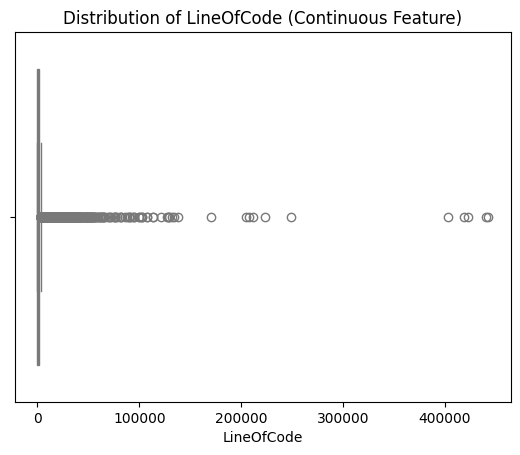

# LargestLineLength


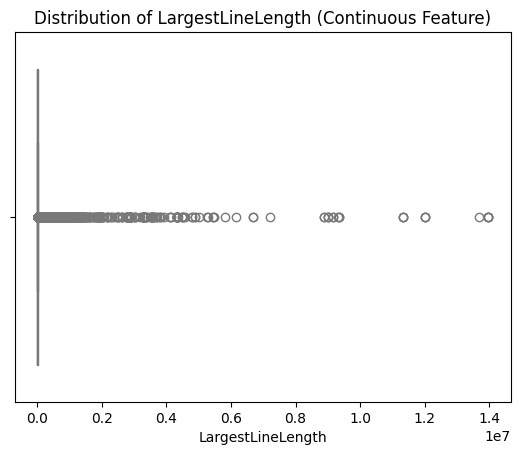

# HasTitle


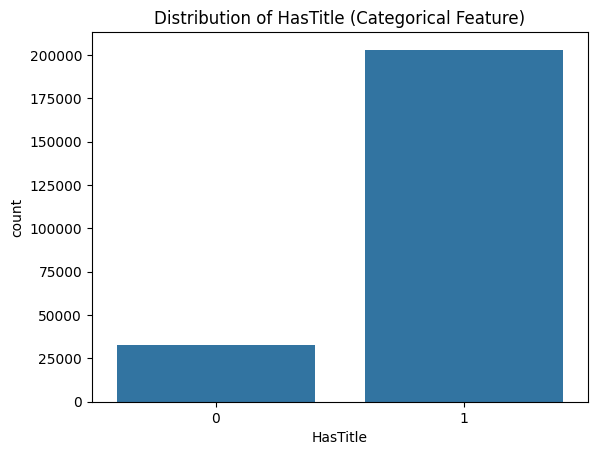

# Title


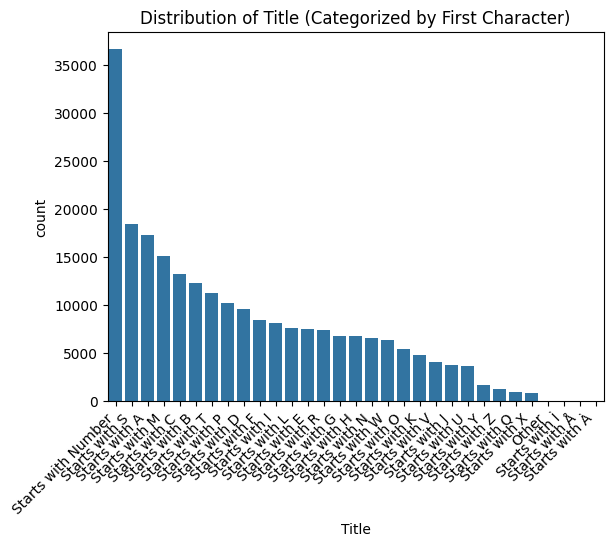

# DomainTitleMatchScore


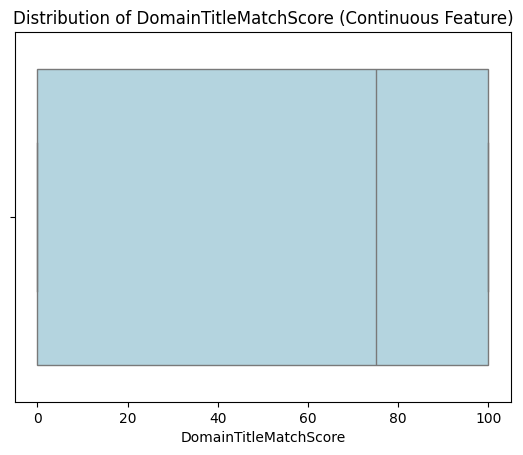

# URLTitleMatchScore


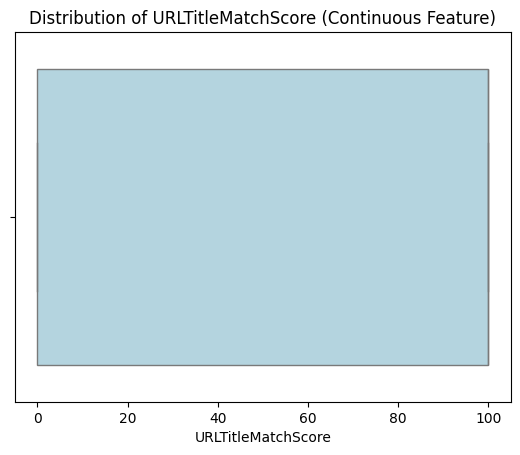

# HasFavicon


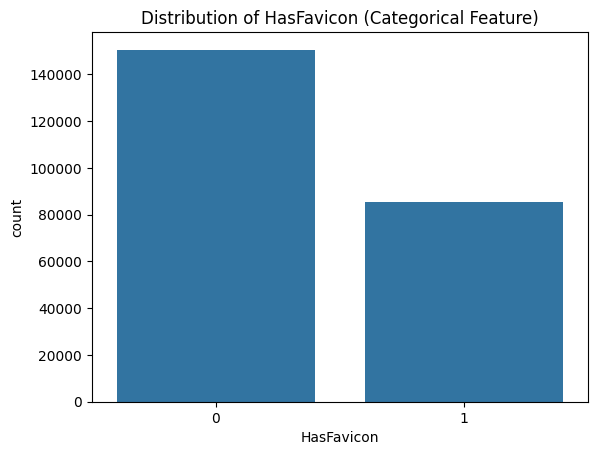

# Robots


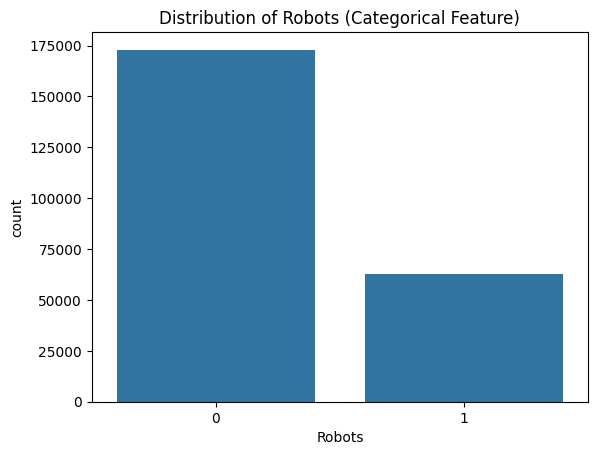

# IsResponsive


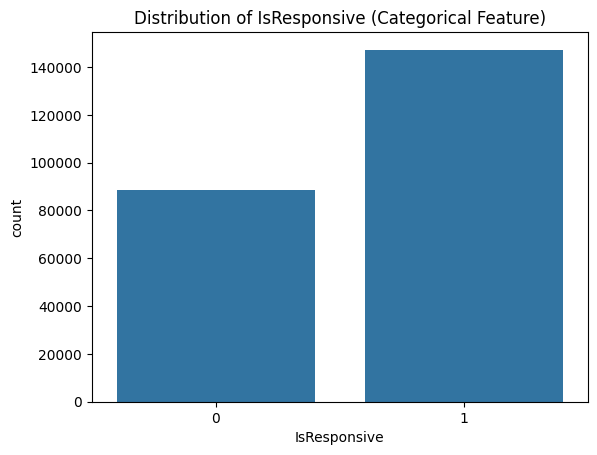

# NoOfURLRedirect


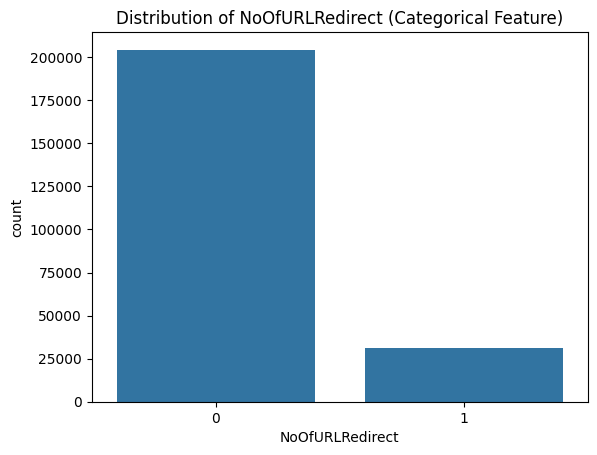

# NoOfSelfRedirect


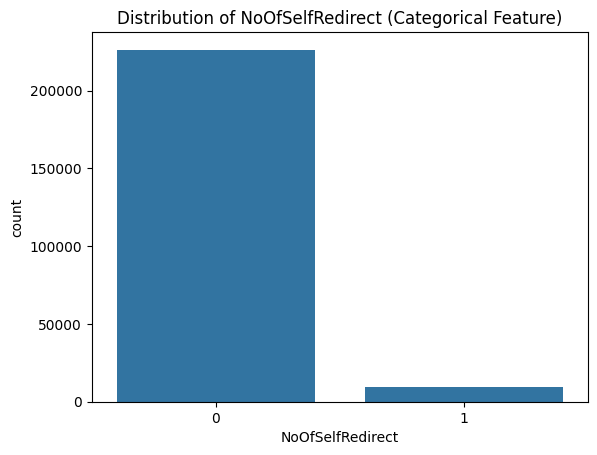

# HasDescription


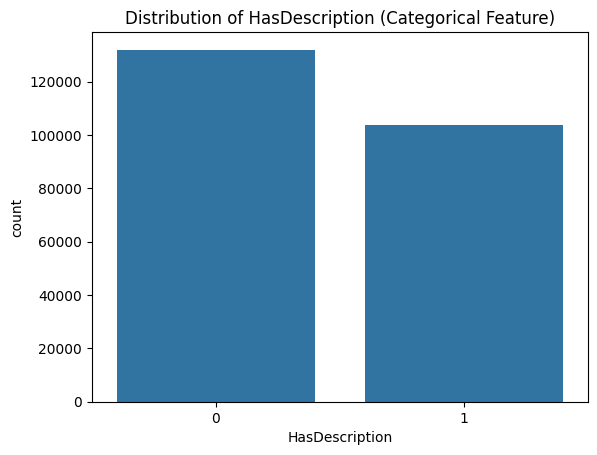

# NoOfPopup


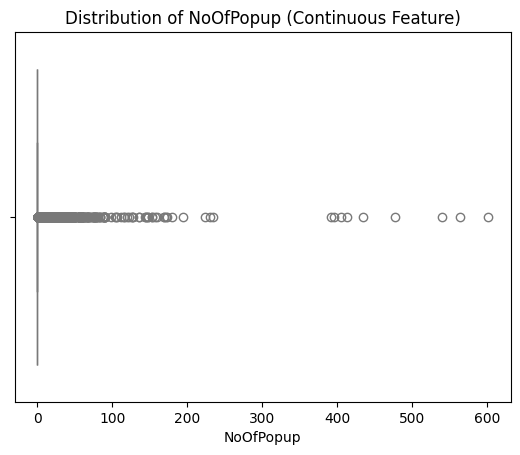

# NoOfiFrame


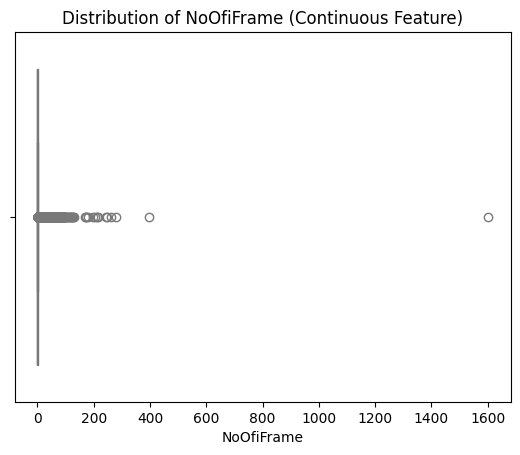

# HasExternalFormSubmit


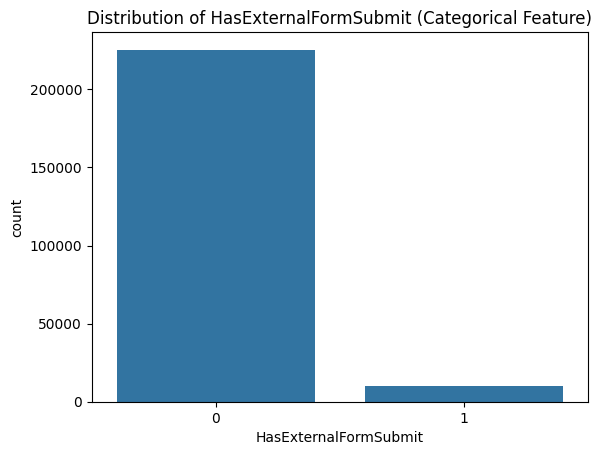

# HasSocialNet


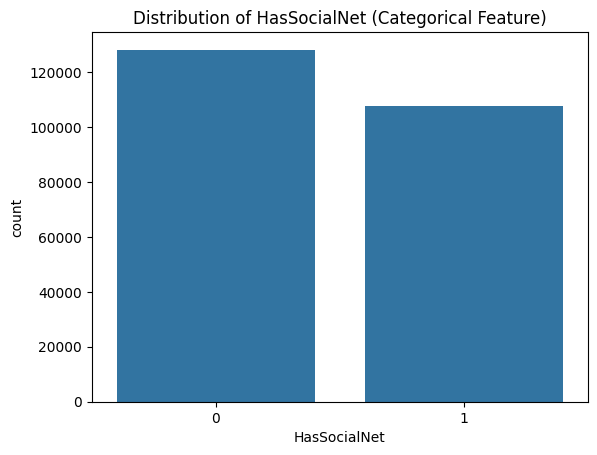

# HasSubmitButton


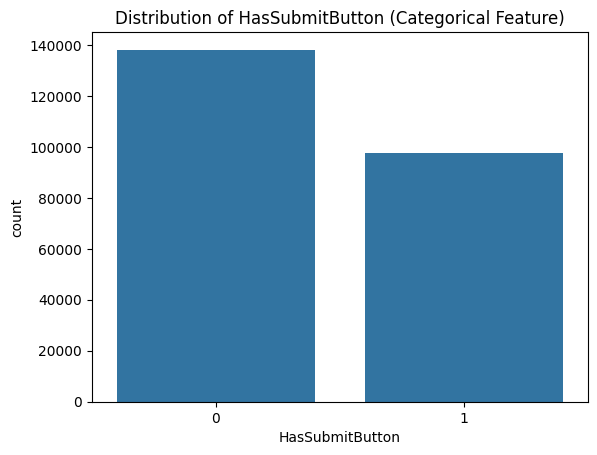

# HasHiddenFields


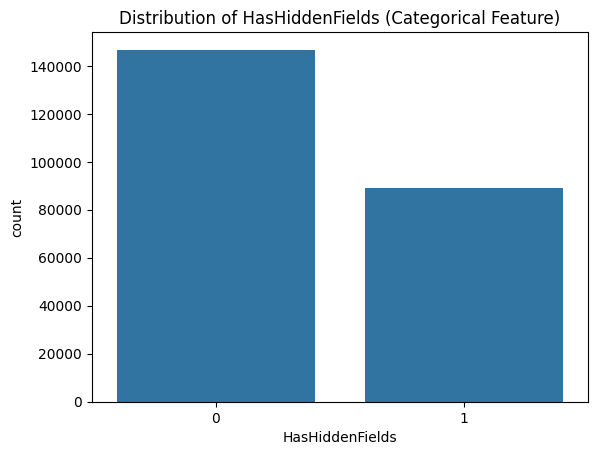

# HasPasswordField


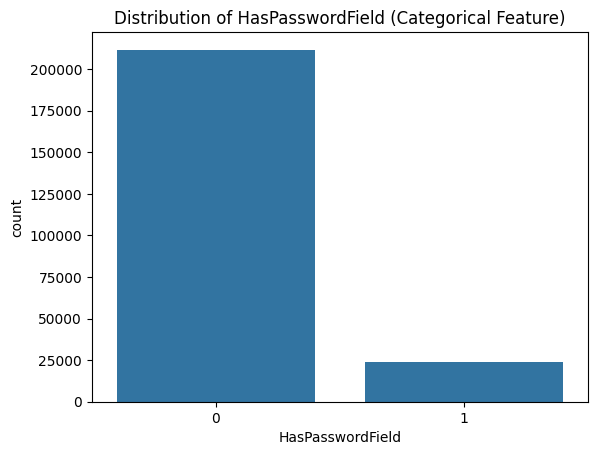

# Bank


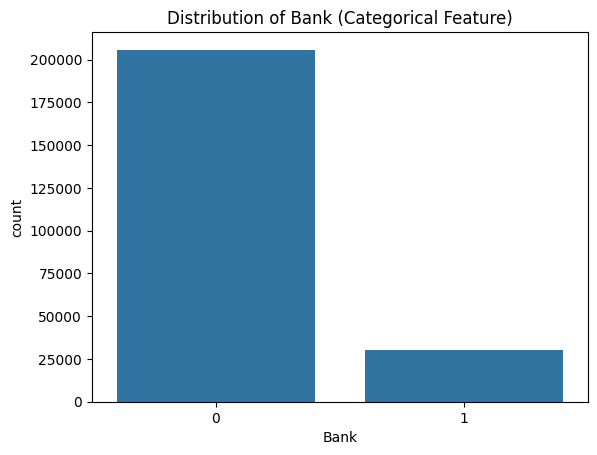

# Pay


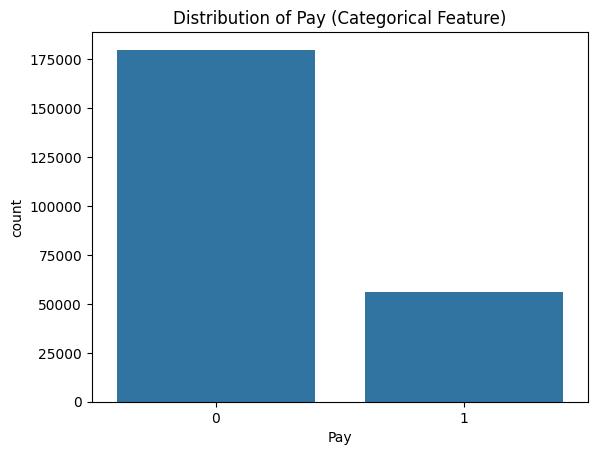

# Crypto


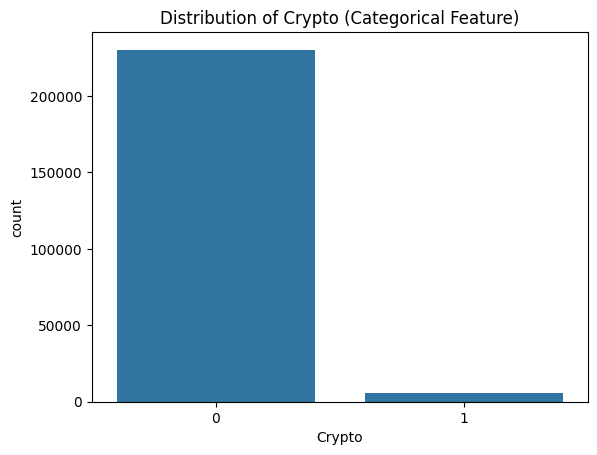

# HasCopyrightInfo


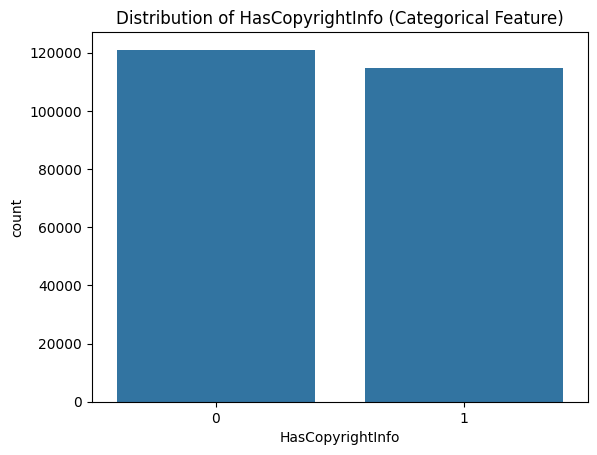

# NoOfImage


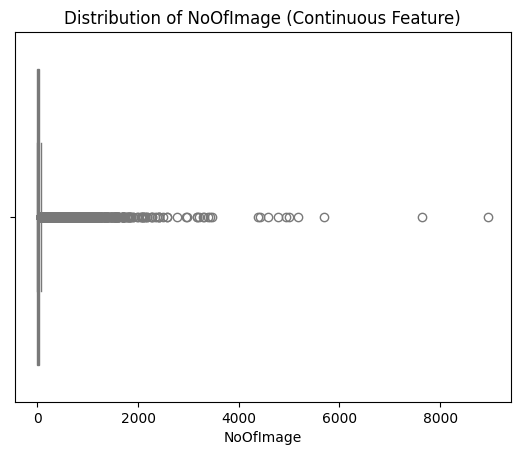

# NoOfCSS


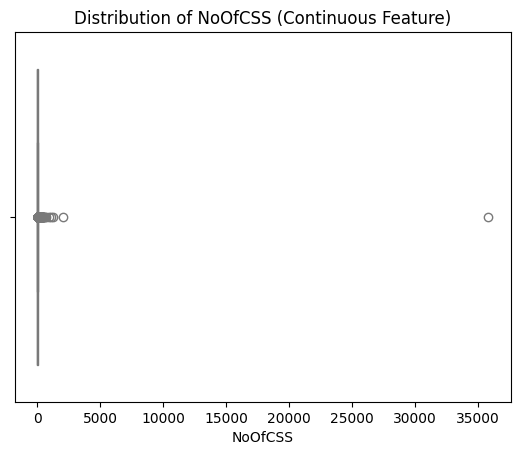

# NoOfJS


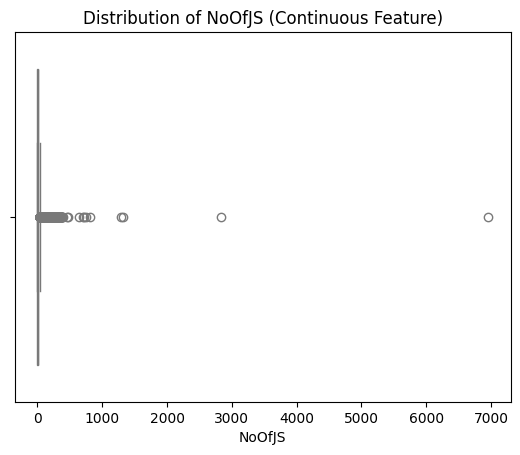

# NoOfSelfRef


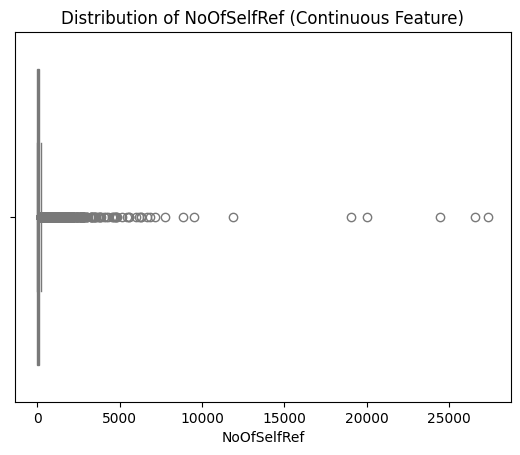

# NoOfEmptyRef


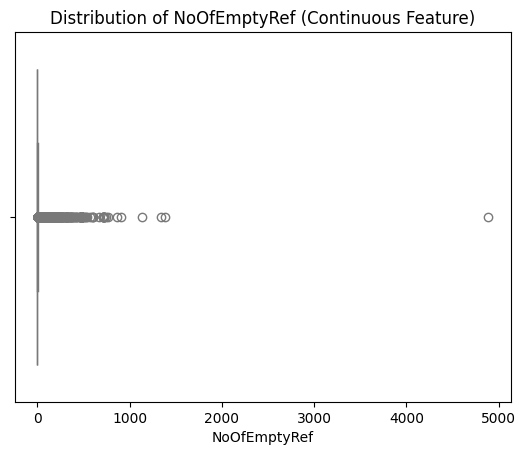

# NoOfExternalRef


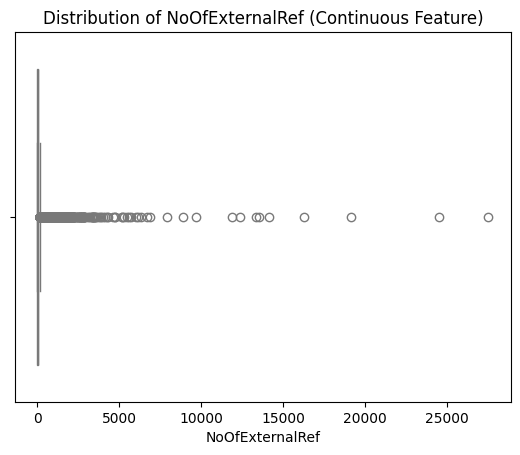

# label


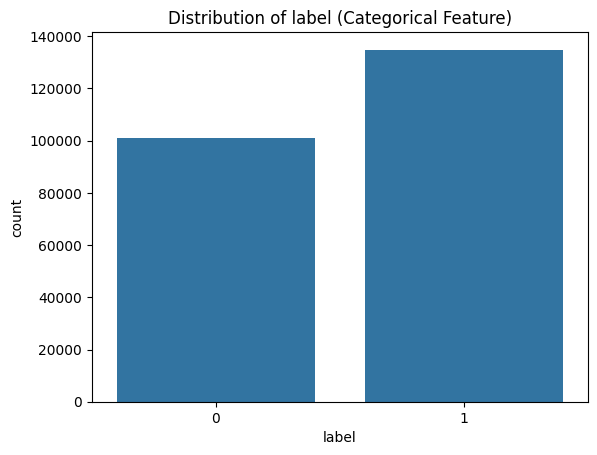

In [12]:
for col in df.columns:
    if col == "id": continue

    display(Markdown(f"# {col}\n"))
    if col in categorical_columns:
        plot_column_distribution(df, col)
        if col in ["FILENAME", "Domain", "TLD", "Title"]:
            plt.xticks(rotation=45, ha='right')
    elif col in continuous_columns:
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f'Distribution of {col} (Continuous Feature)')

    plt.show()

#### 3. Visualize the correlation between features and the target variable.

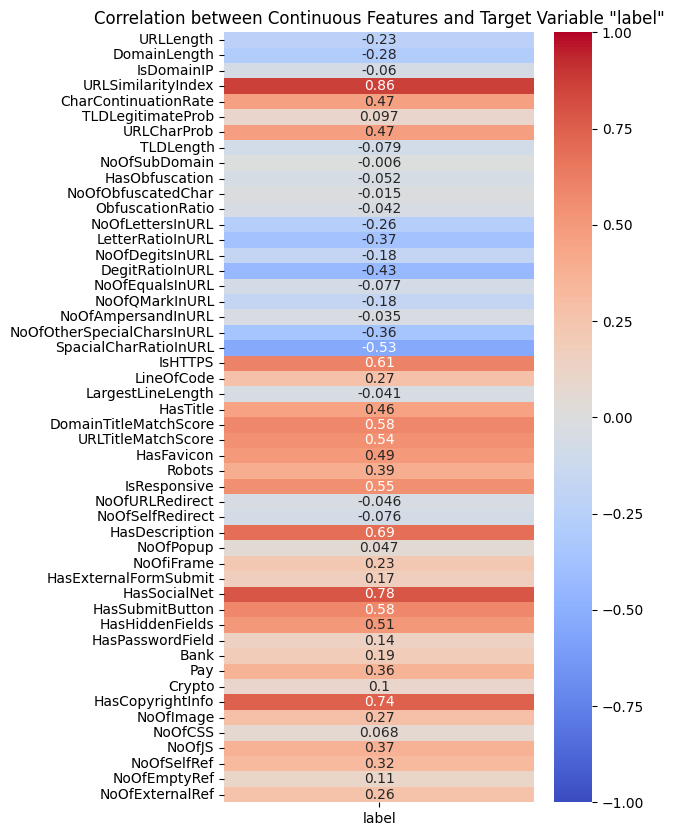

In [13]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_features.corr()
corr_feature_target = corr[['label']].drop(index='label')

# Plotting heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(corr_feature_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Continuous Features and Target Variable "label"')
plt.show()

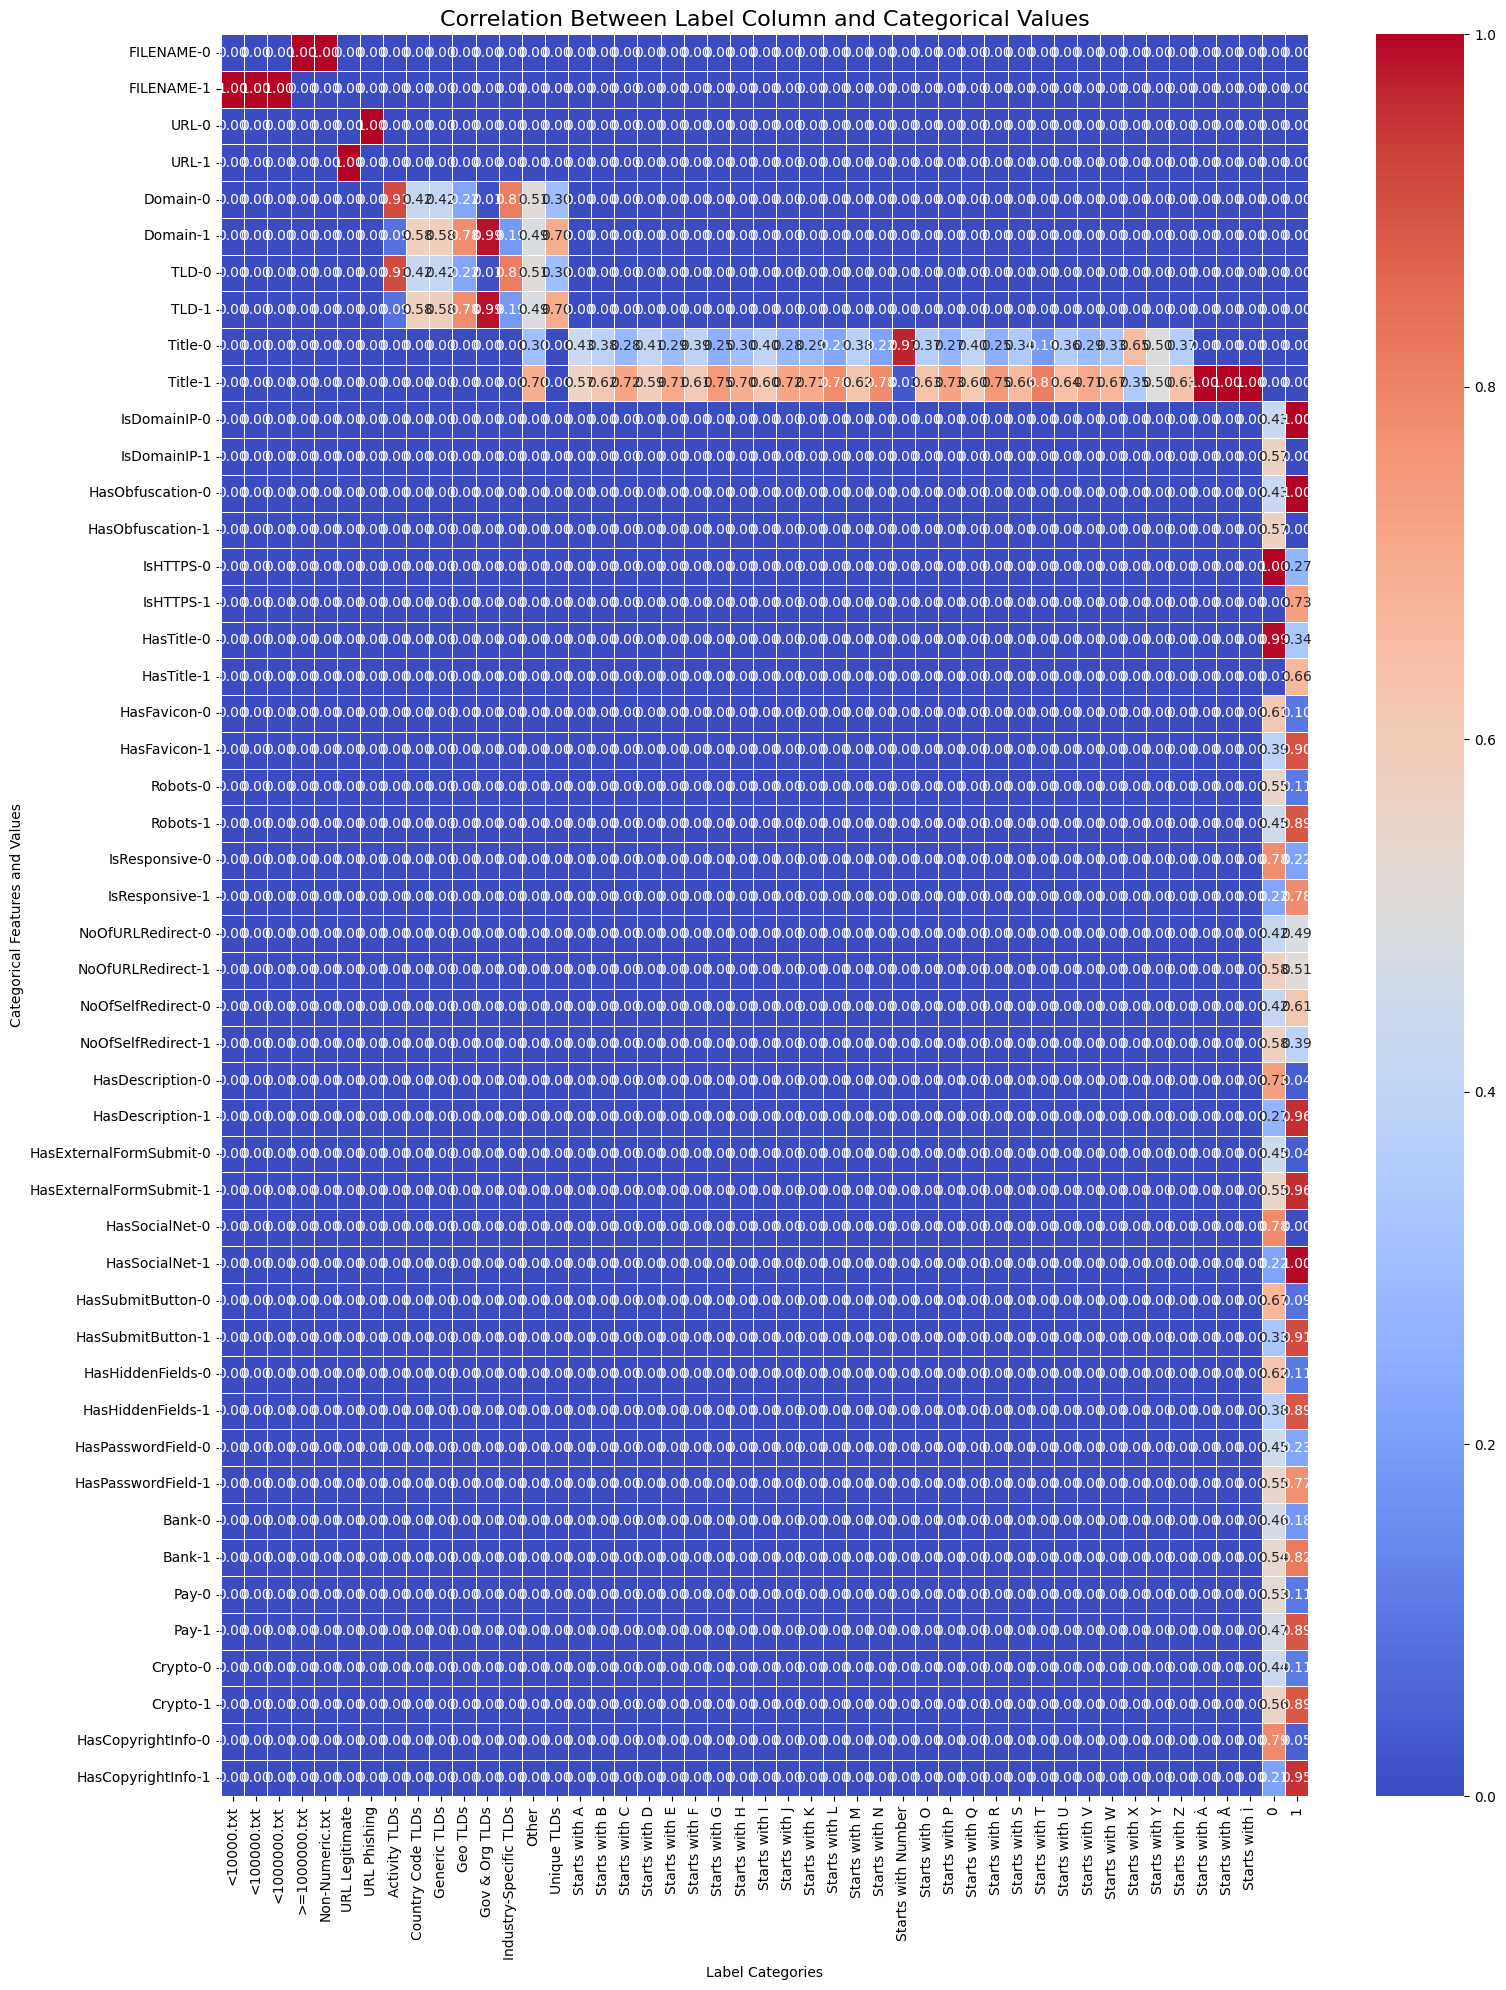

In [14]:
def categorical_label_correlations(pair_counts, label_column="label"):
    # Initialize a dictionary to hold correlations
    correlation_results = []

    # Iterate over each categorical column in pair_counts
    for cat_col, pair_count in pair_counts.items():
        if cat_col == label_column:
            continue  # Skip the label column itself

        # Normalize pair counts for each label value
        label_totals = pair_count.sum(axis=0)  # Sum occurrences for each label (0 and 1)
        normalized_counts = pair_count.div(label_totals, axis=1)  # Normalize by label totals

        # Flatten and append to results
        flattened = normalized_counts.reset_index()
        flattened['Feature'] = cat_col  # Add a column for the feature name
        correlation_results.append(flattened)

    # Combine all flattened data into a single DataFrame
    correlation_df = pd.concat(correlation_results, axis=0)
    correlation_df = correlation_df.set_index(['Feature', correlation_df.columns[0]]).fillna(0)

    # Plot heatmap with categorical values on y-axis
    plt.figure(figsize=(16, 20))  # Adjust figure size for better readability
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Between Label Column and Categorical Values', fontsize=16)
    plt.xlabel('Label Categories')
    plt.ylabel('Categorical Features and Values')
    plt.tight_layout()
    plt.show()

    return correlation_df

# Example usage with your pair_counts dictionary
correlation_df = categorical_label_correlations(pair_counts)


#### 4. Explain the significance of understanding feature distributions and correlations.

Pemahaman mengenai distribusi fitur dan korelasi antar fitur sangat penting untuk memperoleh wawasan tentang bagaimana **data saling berhubungan dan keterkaitan data** pada masalah yang ingin dipecahkan. **Korelasi antar fitur** dapat membantu **mengidentifikasi hubungan yang signifikan dan mengetahui variabel yang berperan dalam model prediksi**. **Visualisasi distribusi** setiap fitur, baik kategorikal maupun non-kategorikal, **memberikan gambaran tentang karakteristik data**, seperti apakah fitur memiliki distribusi normal atau terdapat outlier yang perlu diperhatikan. Sementara itu, **visualisasi korelasi antara fitur dan variabel target** memungkinkan untuk **mengidentifikasi pengaruh variabel independen terhadap variabel dependen**, sehingga dapat membantu dalam pemilihan fitur yang relevan untuk pembuatan model dan strategi analisis yang lebih tepat.

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

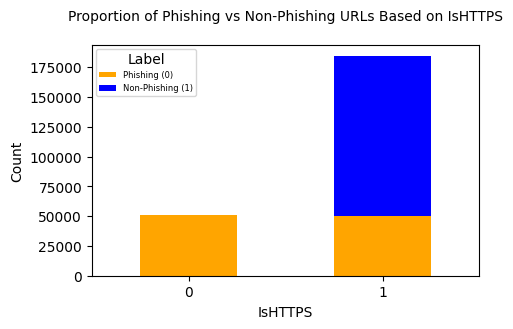

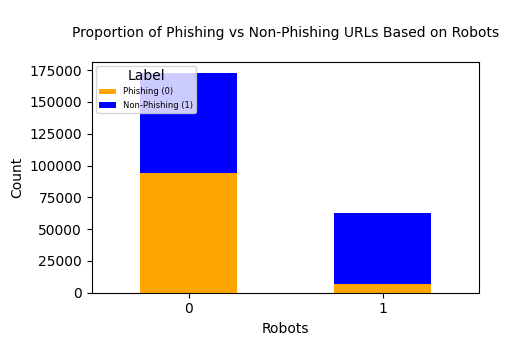

In [15]:
df['IsHTTPS'] = df['IsHTTPS'].fillna('NaN')
df['Robots'] = df['Robots'].fillna('NaN')

colors = {'0': 'orange', '1': 'blue', 'NaN': 'grey'}

https_counts = df.groupby(['IsHTTPS', 'label']).size().unstack(fill_value=0)
https_counts.plot(kind='bar', stacked=True, color=[colors[str(i)] for i in https_counts.columns], figsize=(5, 3))
plt.title('Proportion of Phishing vs Non-Phishing URLs Based on IsHTTPS\n', fontsize=10)
plt.xlabel('IsHTTPS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Phishing (0)', 'Non-Phishing (1)'], loc='upper left', fontsize=6)
plt.show()

robots_counts = df.groupby(['Robots', 'label']).size().unstack(fill_value=0)
robots_counts.plot(kind='bar', stacked=True, color=[colors[str(i)] for i in robots_counts.columns], figsize=(5, 3))
plt.title('\nProportion of Phishing vs Non-Phishing URLs Based on Robots\n', fontsize=10)
plt.xlabel('Robots')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Phishing (0)', 'Non-Phishing (1)'], loc='upper left', fontsize=6)
plt.show()

Berdasarkan hasil analisis, terdapat perbedaan yang signifikan antara URL phishing dan non-phishing pada fitur keamanan seperti IsHTTPS dan Robots.
- Pada fitur IsHTTPS, mayoritas URL non-phishing (label = 1) menggunakan protokol HTTPS (IsHTTPS = 1) yang menunjukkan bahwa URL non-phishing cenderung menggunakan enkripsi untuk melindungi koneksi pengguna. Sebaliknya, URL phishing (label = 0) cenderung tidak menggunakan HTTPS (IsHTTPS = 0) atau memiliki nilai yang tidak tersedia (IsHTTPS = NaN). Hal ini menunjukkan bahwa URL phishing lebih jarang memanfaatkan protokol keamanan seperti HTTPS sehingga fitur ini dapat menjadi indikator dalam menentukan URL phishing dan URL legitimate.
- Pada fitur Robots, URL phishing dan non-phishing pada umumnya tidak menggunakan Robots (Robots = 0). Selain itu, baik URL phishing maupun non-phishing ada yang menggunakan robot (Robots = 1), ada yang tidak menggunakan robot (Robots = 0), serta ada yang tidak tersedia (Robots = NaN). Oleh karena itu, penggunaan robot atau tidak belum mampu memberikan informasi tambahan dalam membedakan URL phishing maupun non-phishing.

Secara keseluruhan, fitur **IsHTTPS** dapat digunakan untuk membedakan URL phishing dan non-phishing sedangkan fitur **Robots** belum dapat memberikan informasi yang signifikan.

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

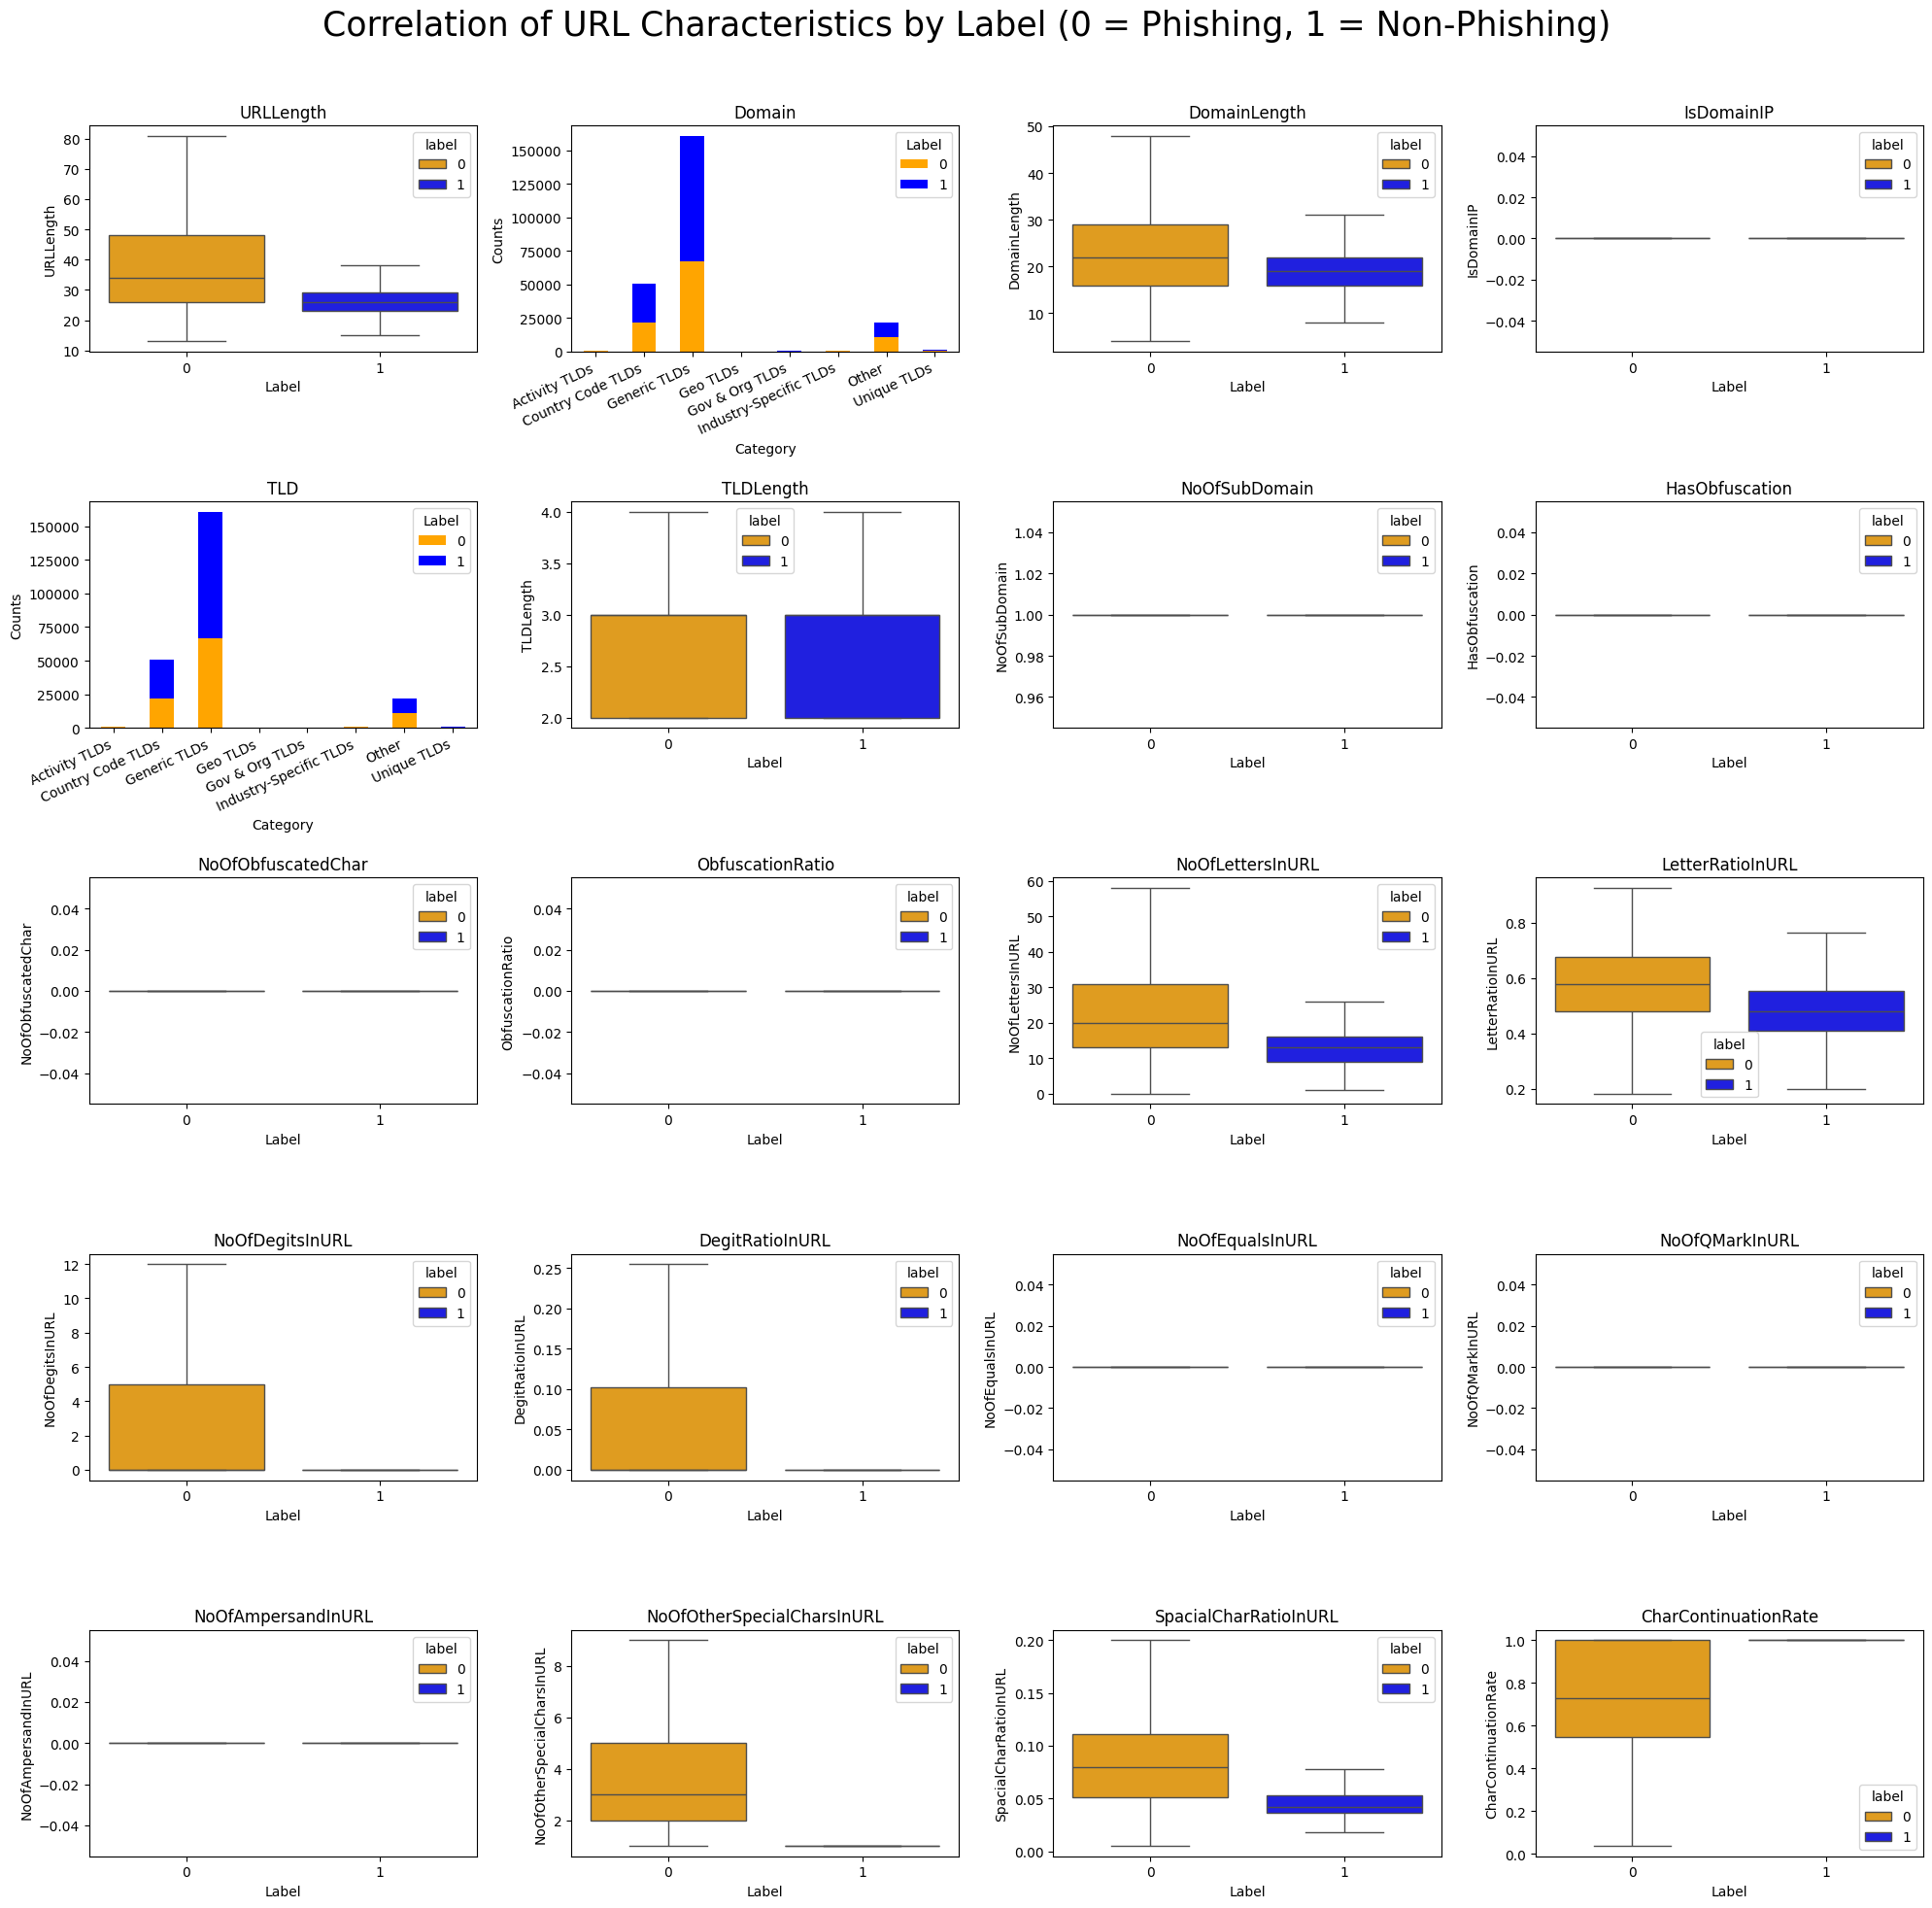

In [16]:
url_characteristics = [
    'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'TLDLength',
    'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
    'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
    'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
    'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'CharContinuationRate'
]

plt.figure(figsize=(20, 20))
plt.suptitle("Correlation of URL Characteristics by Label (0 = Phishing, 1 = Non-Phishing)", fontsize=25)

for i, feature in enumerate(url_characteristics, 1):
    plt.subplot(5, 4, i)

    if feature in ['Domain', 'TLD']:
        grouped_data = df.groupby([df[feature].apply(categorize_tld), 'label']).size().unstack(fill_value=0)
        grouped_data.plot(kind='bar', stacked=True, color={0: 'orange', 1: 'blue'}, ax=plt.gca())
        plt.title(f'{feature}')
        plt.xlabel('Category\n')
        plt.ylabel('Counts')
        plt.xticks(rotation=25, ha='right')
        plt.legend(title='Label', labels=['0', '1'])
    else:
        sns.boxplot(data=df, x='label', y=feature, hue='label', palette={0: 'orange', 1: 'blue'}, showfliers=False)
        plt.title(f'{feature}')
        plt.xlabel('Label')
        plt.ylabel(feature)

# Displaying the plots with proper layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Berdasarkan analisis yang telah dilakukan, didapatkan hasil sebagai berikut.
- Fitur **URLLength**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi URLLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 20an hingga 40an dengan nilai tengah 30an. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 20an.
- Fitur **Domain**: Beberapa domain dan kategori domain lebih sering muncul pada URL non-phishing dibandingkan phishing. Misalnya, domain dengan kategori "Generic TLD", "Country Code TLD" atau "Other" lebih dominan pada URL non-phishing.
- Fitur **DomainLength**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 15 hingga 30 dengan nilai tengah 20an. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 15 sampai 20.
- Fitur **IsDomainIP**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **TLD**: URL phishing cenderung menggunakan TLD tertentu seperti TLD generik atau tidak dikenal. Legitimate URL lebih sering menggunakan TLD populer seperti .com atau .org.
- Fitur **TLDLength**: Panjang TLD tidak menunjukkan perbedaan yang sangat signifikan antara kedua label, meskipun URL non-phishing cenderung memiliki panjang TLD yang sedikit lebih besar
- Fitur **NoOfSubDomain**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 1. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **HasObfuscation**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfObfuscatedChar**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **ObfuscationRatio**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfLettersInURL**: URL phishing cenderung memiliki lebih banyak huruf dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 12 hingga 30 dengan nilai tengah 20. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 9 sampai 15.
- Fitur **LetterRatioInURL**: URL phishing cenderung memiliki rasio huruf terhadap total panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 0.5 hingga 0.68 dengan nilai tengah 0.58. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 0.4 sampai 0.55.
- Fitur **NoOfDegitsInURL**: Sebagian besar URL legitimate tidak memiliki digit yang banyak karena mendekati nilai 0. Sebaliknya, URL phishing memiliki persebaran data dari 0 hingga 433 dengan nilai mayoritas dari 0 hingga 5.
- Fitur **DegitsRatioInURL**: Sebagian besar URL legitimate tidak memiliki rasio digit yang panjang karena mendekati nilai 0. Sebaliknya, URL phishing memiliki persebaran data dari 0 hingga 0.6 dengan nilai mayoritas dari 0 hingga 0.1.
- Fitur **NoOfEqualsInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfQMarkInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfAmpersandInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfOtherSpecialCharInURL**: Sebagian besar URL legitimate tidak memiliki karakter khusus lainnya karena mendekati nilai 1. Sebaliknya, URL phishing memiliki persebaran data mayoritas dari 2 sampai 5.
- Fitur **SpecialCharRatioInURL**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi URLLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 0.05 hingga 0.1 dengan nilai tengah 0.8. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas berada pada kisaran 0.05.
- Fitur **CharContinuationRate**: Sebagian besar URL legitimate memiliki tingkat kesinambungan karakter yang tinggi karena mendekati nilai 1. Sebaliknya, URL phishing memiliki persebaran data dengan nilai mayoritas dari 0.5 hingga 1.

Secara keseluruhan, fitur yang ada selain IsDomainIP, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, NoOfEqualsInURL, NoOfQMarkInURL, dan NoOfAmpersandInURL perlu digunakan bersama untuk dapat membedakan URL phishing dan non-phising.

#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

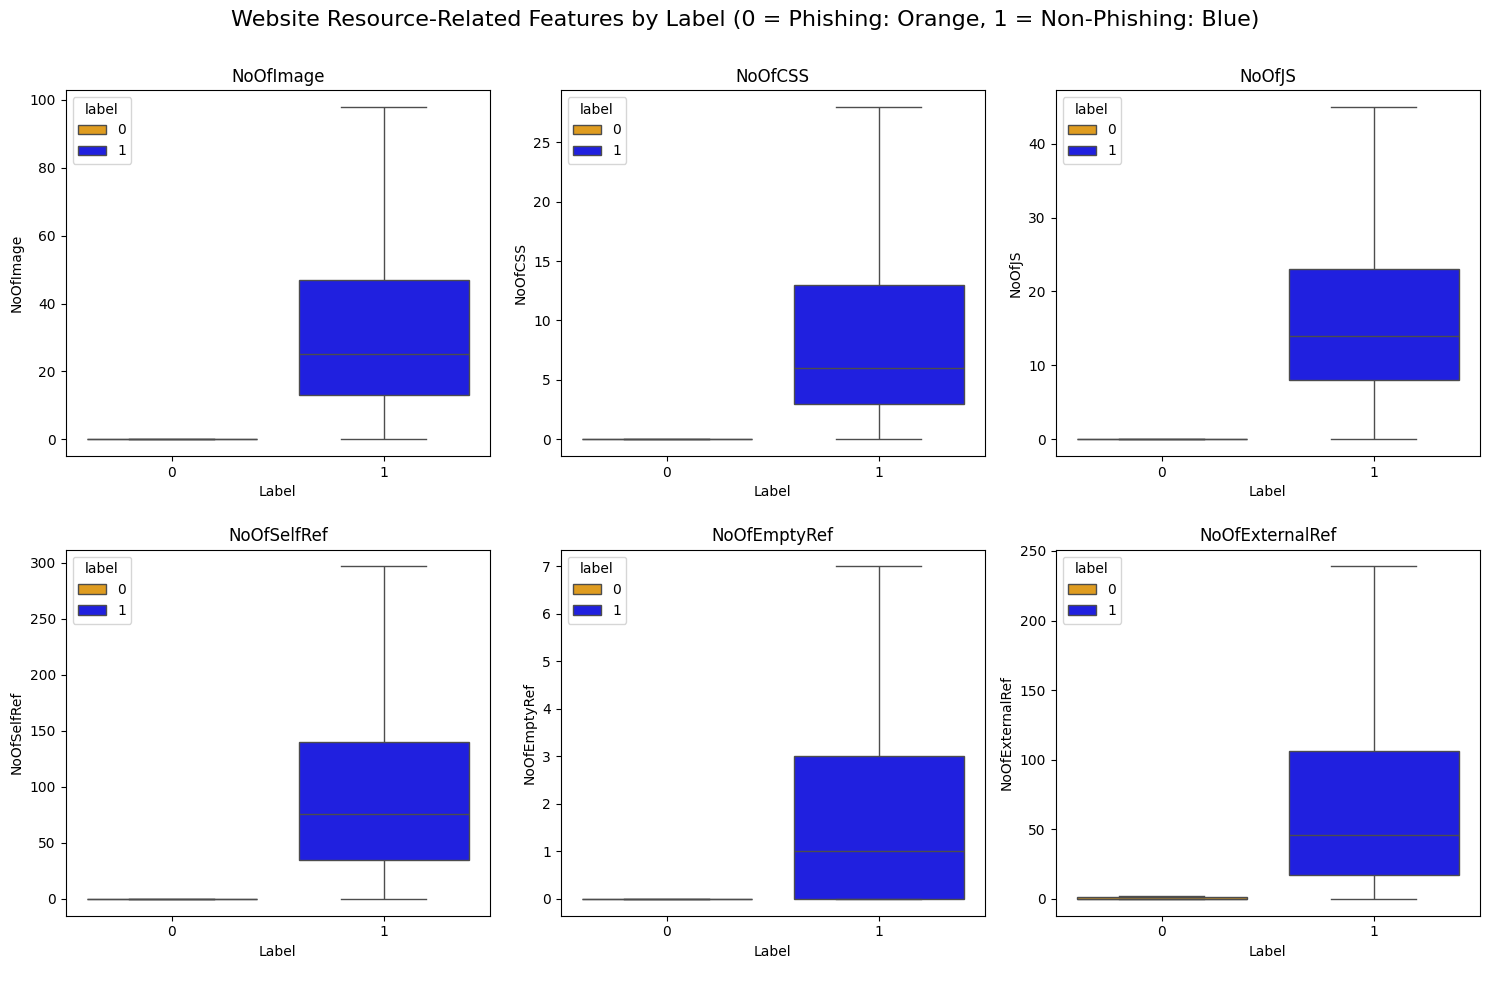

In [17]:
resource_features = ['NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

# Set figure size and title
plt.figure(figsize=(15, 10))
plt.suptitle("Website Resource-Related Features by Label (0 = Phishing: Orange, 1 = Non-Phishing: Blue)", fontsize=16)

# Create box plots
for i, feature in enumerate(resource_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='label', y=feature, hue='label', palette={0: 'orange', 1: 'blue'}, showfliers=False)
    plt.title(f'{feature}')
    plt.xlabel('Label\n')
    plt.ylabel(feature)

# Displaying the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan analisis yang telah dilakukan, didapatkan hasil sebagai berikut.
- Fitur **NoOfImage**: URL phishing cenderung memiliki nilai yang mendekati nol sedangkan URL legitimate memiliki nilai yang beragam dimulai dari 0 hingga 8956 dengan nilai yang paling banyak berada di angka 20an dan persebaran paling banyak di antara 15 hingga 50. Hal ini menunjukkan bahwa situs legitimate lebih sering menggunakan gambar.
- Fitur **NoOfCSS**: URL phishing cenderung memiliki nilai yang mendekati nol sedangkan URL legitimate memiliki nilai yang beragam dimulai dari 0 hingga 35820 dengan nilai yang paling banyak berada di sela angka 6 atau 7 dan persebaran paling banyak di antara 2 hingga 14. Hal ini menunjukkan bahwa situs legitimate mengandung banyak jumlah file CSS.
- Fitur **NoOfJS**: Jumlah file JavaScript pada URL legitimate lebih banyak dibandingkan dengan phishing yang mendekati nilai 0 (tidak memiliki file JS). Jumlah file pada URL legitimate berkisar dari 0 hingga 2828 dengan nilai paling tinggi berada di antara angka 12 dan 13 serta persebaran paling banyak di rentang 8-25.
- Fitur **NoOfSelfRef**: URL legitimate memiliki jumlah referensi ke diri sendiri yang jauh lebih tinggi dengan kisaran 0 hingga 26596 dibandingkan dengan phishing yang hampir selalu mendekati nilai nol. Persebaran nilai jumlah referensi untuk URL legitimate berada di rentang 40an hingga 130an dan modus pada nilai 70an.
- Fitur **NoOfEmptyRef**: Referensi kosong lebih umum pada URL Legitimate, meskipun jumlahnya relatif kecil. Referensi kosong pada URL legitimate lebih banyak berada pada angka 1 dengan kisaran angka 0-3. Hal ini menunjukkan fitur ini kurang signifikan dibandingkan yang lain.
- Fitur **NoOfExternalRef**: URL legitimate memiliki jumlah referensi eksternal dimulai dari 0 hingga 27516 dengan kisaran paling banyak di antara 10an hingga 100 dan modus pada angka 40an.

Kesimpulan: Dari fitur yang ada menunjukkan bahwa URL phishing cenderung minimalis, tanpa adanya gambar, file CSS, JavaScript atau self referensi dan eksternal referensi. Sebaliknya, URL legitimate cenderung memiliki banyak elemen ini.

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. How do the features related to form submissions and external interactions relate to phishing and non-phishing URLs?

Website resource related features:
- `HasExternalFormSubmit`
- `HasSocialNet`
- `HasSubmitButton`
- `HasHiddenFields`
- `HasPasswordField`

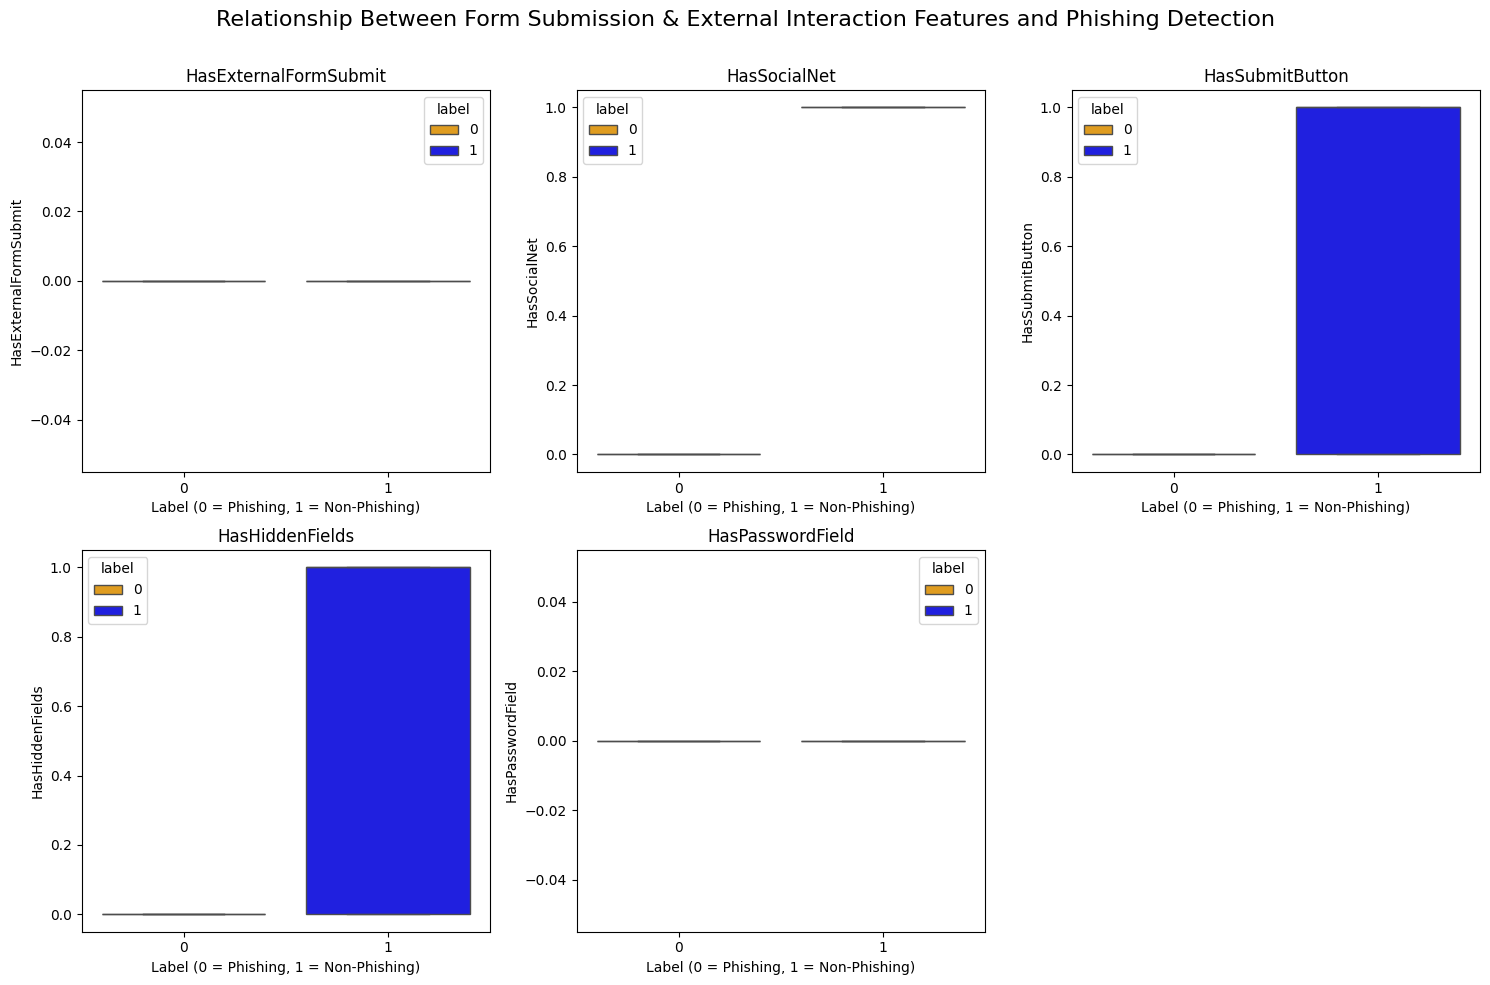

In [18]:
form_and_external_interaction_features = [
    'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField'
]

plt.figure(figsize=(15, 10))
plt.suptitle("Relationship Between Form Submission & External Interaction Features and Phishing Detection", fontsize=16)

for i, feature in enumerate(form_and_external_interaction_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='label', y=feature, hue='label', palette={0: 'orange', 1: 'blue'}, showfliers=False)
    plt.title(f'{feature}')
    plt.xlabel('Label (0 = Phishing, 1 = Non-Phishing)')
    plt.ylabel(feature)

# Display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan grafik hubungan antar fitur terkait form submissions dan external interactions dengan phishing detection, berikut adalah analisisnya.
- Fitur **HasExternalFormSubmit** menunjukkan bahwa antara URL phising (label = 0) dan non-phishing (label = 1) memperlihatkan data yang banyak ketika tidak memiliki external form submit (HasExternalFormSubmit = 0). Hal ini menunjukkan fitur ini tidak memberikan hasil yang signifikan untuk membedakan antara URL phising dan non-phising.
- Fitur **HasSocialNet** menunjukkan bahwa sebagian besar URL phising tidak memiliki social net (HasSocialNet = 0) dan sebagian besar URL legitimate memiliki social net (HasSocialNet = 1). Hal ini menunjukkan fitur ini dapat digunakan untuk mendeteksi URl phising.
- Fitur **HasSubmitButton** menunjukkan bahwa sebagian besar URL phising tidak memiliki submit button (HasSubmitButton = 0). Sebaliknya, persebaran data antara memiliki submit button atau tidak untuk URL legitimate merata sehingga tidak dapat dideteksi.
- Fitur **HasHiddenFields** menunjukkan bahwa sebagian besar URL phising tidak memiliki hiddden fiels (HasHiddenFields = 0). Sebaliknya, persebaran data antara memiliki hidden fields atau tidak untuk URL legitimate merata sehingga tidak dapat dideteksi.
- Fitur **HasPasswordField** menunjukkan bahwa antara URL phising (label = 0) dan non-phishing (label = 1) memperlihatkan data yang banyak ketika tidak memiliki password field (HasPasswordField = 0). Hal ini menunjukkan fitur ini tidak memberikan hasil yang signifikan untuk membedakan antara URL phising dan non-phising.

Kesimpulan, dari fitur-fitur yang ada, hanya HasSocialNet yang menunjukkan hubungan yang baik untuk mendeteksi URL sedangkan fitur HasHiddenFields dan HasSubmitButton dapat menjadi fitur pendukung untuk mendeteksi URL phishing.

#### 5. How the Correlation Between TLD Legitimacy and URL Character Probability Enhances Phishing Detection?

Domain-related features:
- `TLDLegitimateProb`
- `URLCharProb`

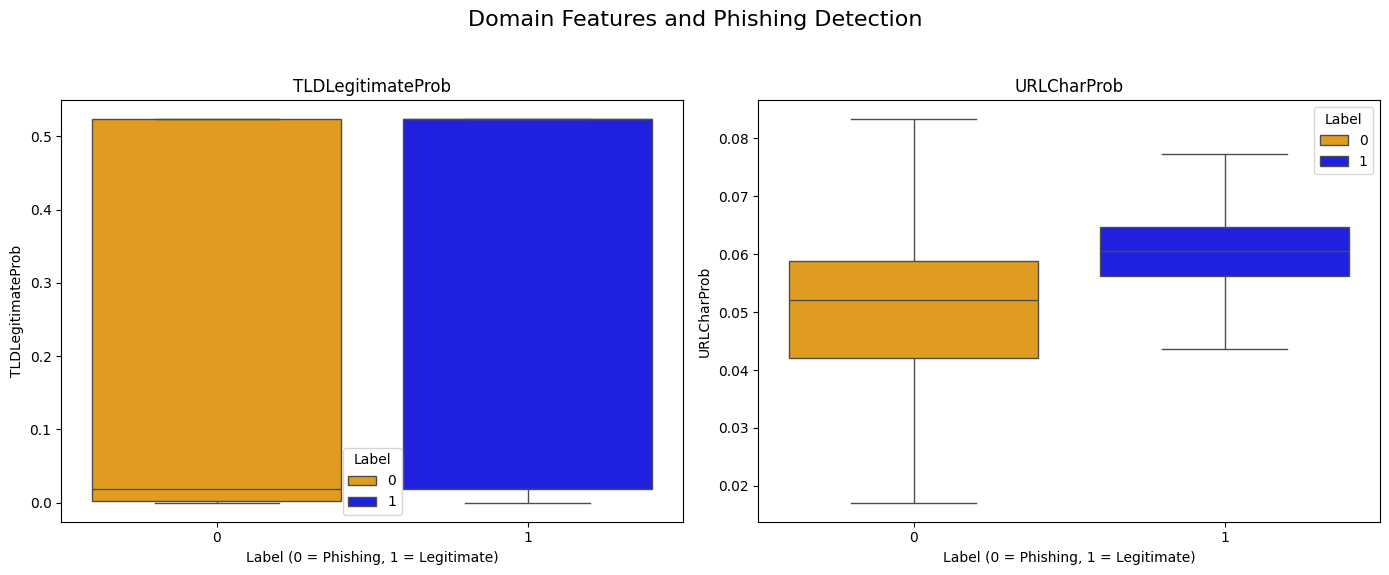

In [19]:
domain_related_features = ['TLDLegitimateProb', 'URLCharProb']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Domain Features and Phishing Detection", fontsize=16)

axes_flat = axes.flatten()
palette={0: 'orange', 1: 'blue'}

for i, feature in enumerate(domain_related_features):
    ax = axes_flat[i]
    sns.boxplot(x='label', y=feature, data=df, hue='label', palette=palette, showfliers=False, ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('Label (0 = Phishing, 1 = Legitimate)')
    ax.set_ylabel(feature)
    ax.legend(title='Label')

# Displaying with adjusted layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Berdasarkan hasil analisis, terdapat dua fitur domain-related yang dianalisis yaitu TLDLegitimateProb dan URLCharProb.
- Fitur **TLDLegitimateProb** tidak menunjukkan perbedaan yang signifikan karena keduanya memiliki persebaran nilai yang merata.
- Fitur **URLCharProb** menunjukkan bahwa URL phishing cenderung memiliki kisaran nilai dari 0.01 hingga 0.1 dengan mayoritas nilai 0.04 hingga 0.06. Sebaliknya, URL legitimate cenderung memiliki kisaran nilai dari 0.04 hingga 0.08 dengan mayoritas nilai sekitaran 0.06.

Secara keseluruhan, kombinasi kedua fitur ini dapat meningkatkan akurasi pendeteksian phishing karena keduanya saling melengkapi.

#### 6. Are there any correlations between webpage metadata features and phishing versus non-phishing URLs?

Webpage Metadata features:
- `HasTitle`
- `HasFavicon`
- `HasDescription`
- `HasCopyright`

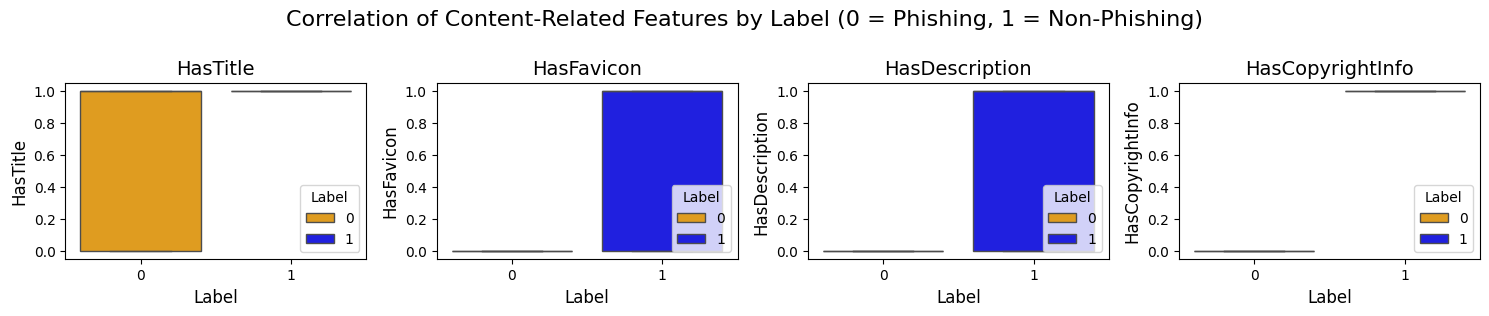

In [20]:
metadata_features = ["HasTitle", "HasFavicon", "HasDescription", "HasCopyrightInfo"]

# Plot setup
plt.figure(figsize=(15, 10))
plt.suptitle("Correlation of Content-Related Features by Label (0 = Phishing, 1 = Non-Phishing)", fontsize=16)
palette = {0: 'orange', 1: 'blue'}

# Box plots for each feature
for idx, feature in enumerate(metadata_features):
    ax = plt.subplot(4, 4, idx + 1)
    sns.boxplot(data=df, x='label', y=feature, hue='label', palette=palette, showfliers=False, ax=ax)
    ax.set_title(feature, fontsize=14)
    ax.set_xlabel("Label", fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.legend(title="Label", loc="lower right")

# Display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Berdasarkan grafik hasil analisis, terdapat korelasi signifikan antara webpage metadata dengan klasifikasi URL phishing maupun non-phising. Fitur **HasFavicon dan HasDescription** menunjukkan bahwa sebagian besar URL phishing tidak memiliki favicon (HasFavicon = 0) dan deskripsi (HasDescription = 0) yang merupakan karakteristik umum dari situs web resmi dan tepercaya. Sebaliknya, URL legitimate memiliki persebaran merata antara memiliki favicon dan deskripsi ataupun tidak.

Fitur **HasTitle** menunjukkan sebagian besar URL legitimate memiliki title (HasTitle = 1). Sebalinya, URL phishing memiliki persebaran data yang merata antara memiliki title ataupun tidak. Fitur **HasCopyrightInfo** menunjukkan bahwa sebagian besar URL phising tidak memiliki copyright info (HasCopyrightInfo = 0) dan sebagian besar URL legitimate memiliki copyright info (HasCopyrightInfo = 1). Secara keseluruhan, webpage metadata features seperti HasCopyrightInfo dapat digunakan untuk mendeteksi URL legitimate atau phishing terutama digabungkan bersama dengan fitur lainnya (HasTitle, HasDescription, dan HasFavicon).


#### 7. How Do Webpage Behavioral and Structural Features Correlate with Phishing vs. Legitimate URLs?

Webpage Behavioral and Structural Features:
- `NoOfURLRedirect`
- `LargestLineLength`
- `LineOfCode`
- `Pay`
- `Bank`
- `Crypto`
- `NoOfPopup`
- `NoOfiFrame`

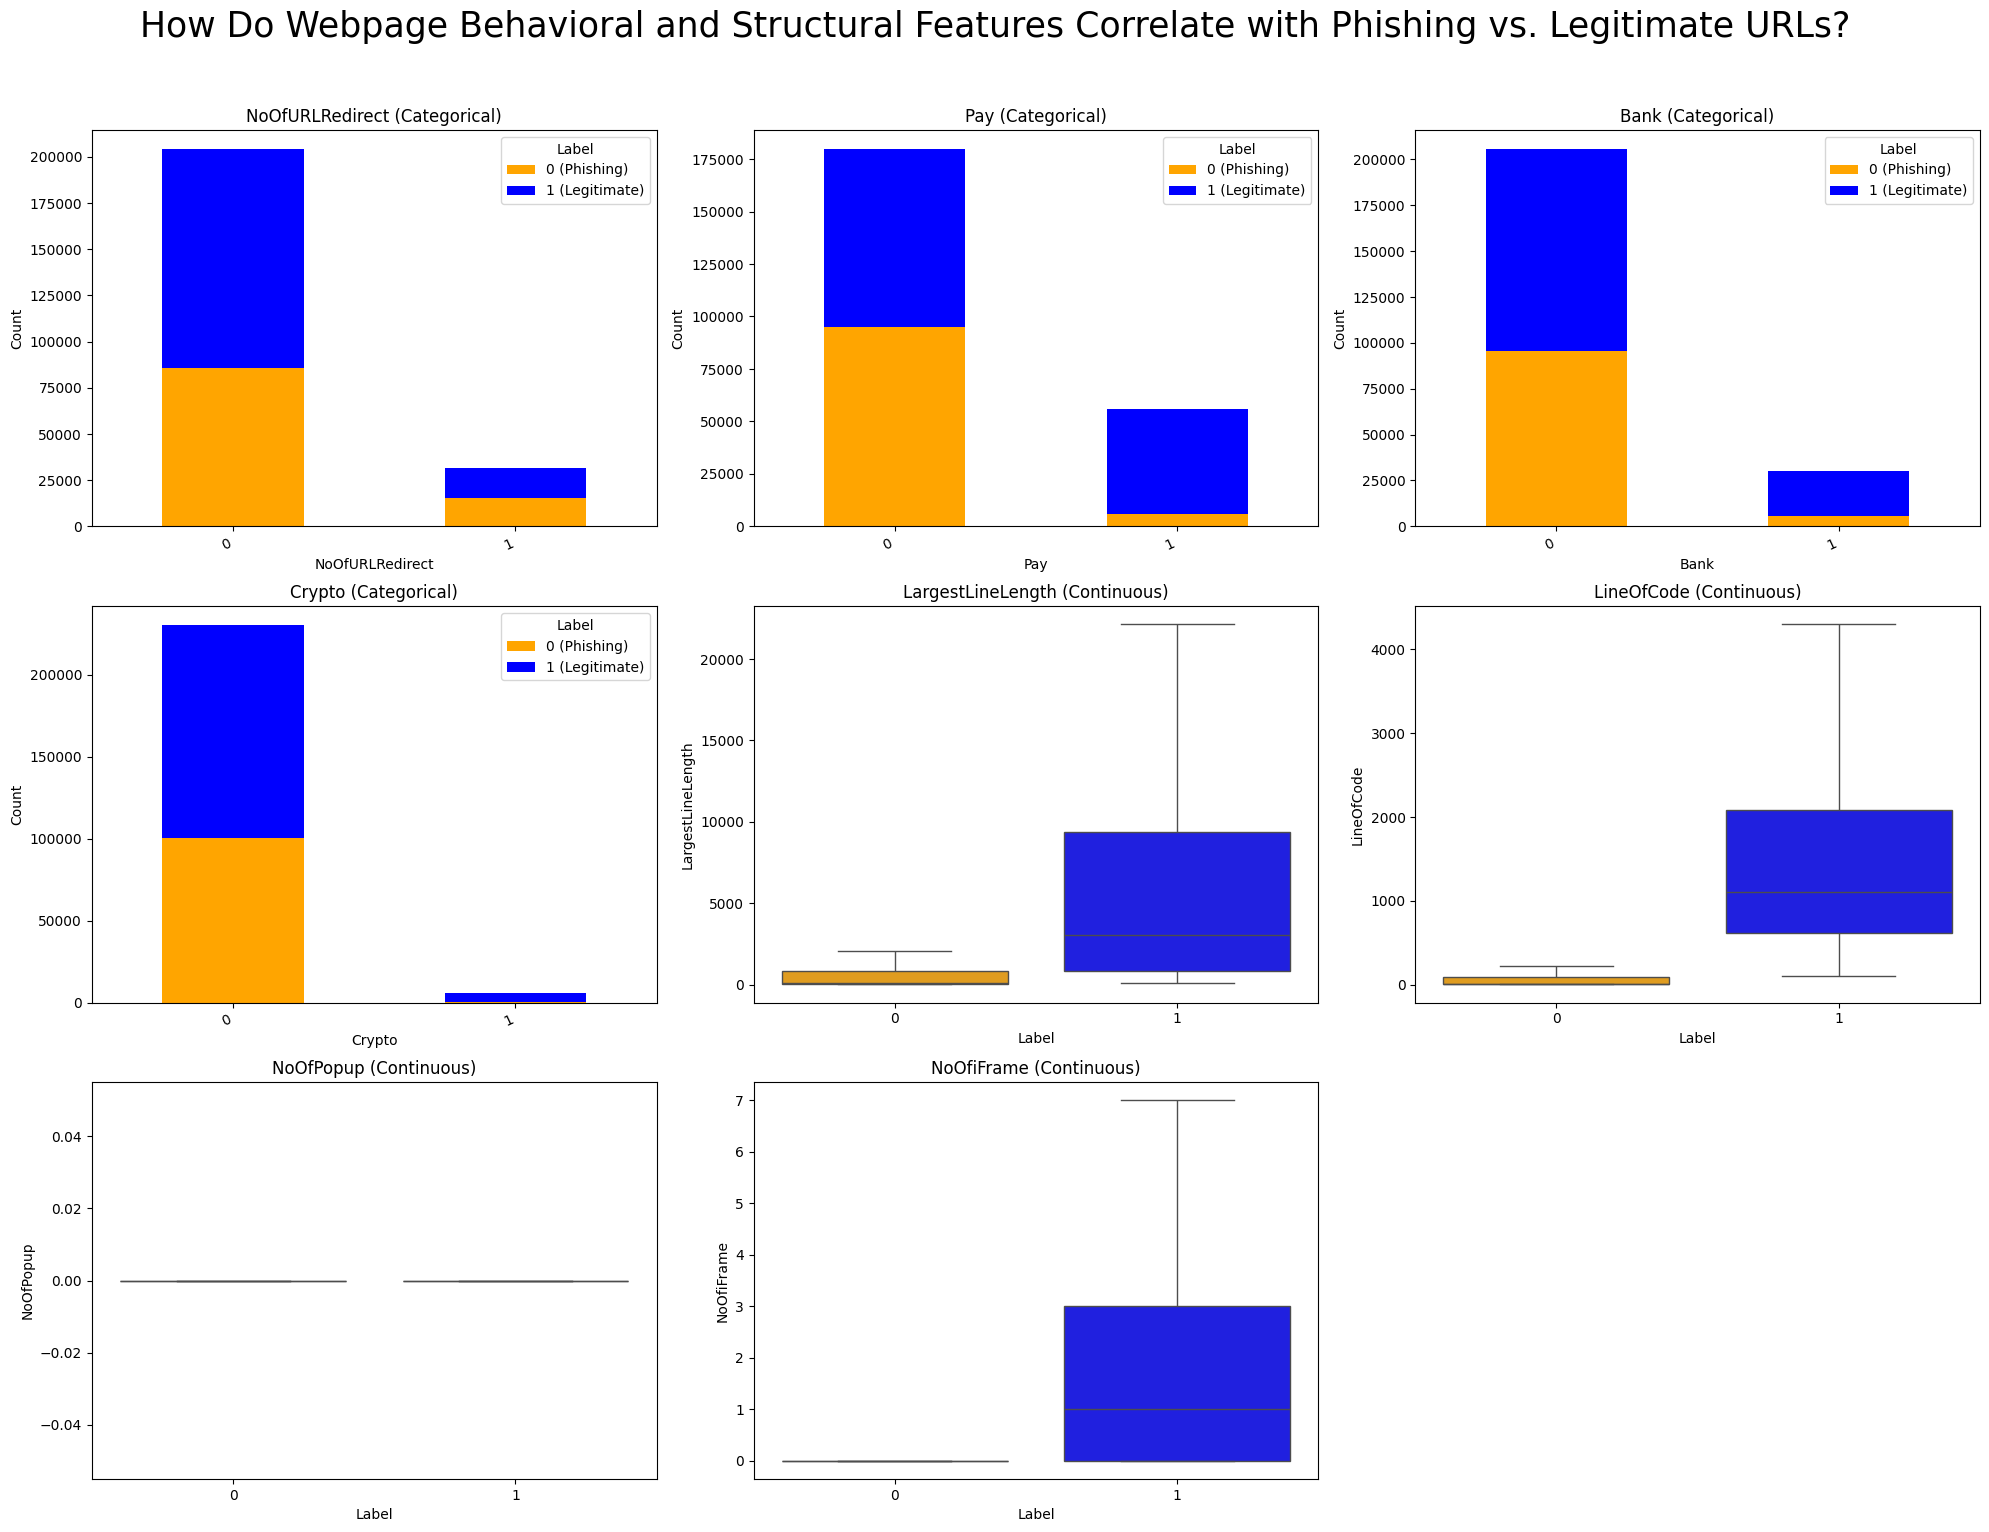

In [21]:
# Example columns - adjust these based on your dataset
categorical_columns = [
    'NoOfURLRedirect',  # assumed categorical (e.g., presence/absence or discrete bins)
    'Pay',              # assumed categorical (keyword presence, etc.)
    'Bank',             # assumed categorical (keyword presence, etc.)
    'Crypto'            # assumed categorical (keyword presence, etc.)
]

continuous_columns = [
    'LargestLineLength',  # from given table of continuous columns
    'LineOfCode',         # from given table of continuous columns
    'NoOfPopup',          # from given table of continuous columns
    'NoOfiFrame'          # from given table of continuous columns
]

# Combine all features into one list for looping, order them how you want to appear in plots
all_features = categorical_columns + continuous_columns

plt.figure(figsize=(20, 20))
plt.suptitle("How Do Webpage Behavioral and Structural Features Correlate with Phishing vs. Legitimate URLs?", fontsize=25)

for i, feature in enumerate(all_features, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid as needed, here 4 rows x 3 cols for up to 12 plots

    if feature in categorical_columns:
        # For categorical features: Show counts stacked by label
        grouped_data = df.groupby([feature, 'label']).size().unstack(fill_value=0)
        # Convert to percentages if desired:
        # grouped_data = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)

        # Plot a stacked bar chart
        grouped_data.plot(kind='bar', stacked=True,
                          color={0: 'orange', 1: 'blue'},
                          ax=plt.gca())
        plt.title(f"{feature} (Categorical)")
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
        plt.xticks(rotation=25, ha='right')
        plt.legend(title='Label', labels=['0 (Phishing)', '1 (Legitimate)'])

    elif feature in continuous_columns:
        # For continuous features: Use boxplot to visualize distribution by label
        sns.boxplot(data=df, x='label', y=feature, hue='label',
                    palette={0: 'orange', 1: 'blue'},
                    showfliers=False, ax=plt.gca())
        plt.title(f"{feature} (Continuous)")
        plt.xlabel('Label')
        plt.ylabel(feature)
        # Remove the extra legend to avoid duplication
        plt.legend([], [], frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


NoOfURLRedirect
LargestLineLength
LineOfCode
Pay
Bank
Crypto
NoOfPopup
NoOfiFrame

Berdasarkan analisis yang telah dilakukan, didapatkan hasil sebagai berikut.
- Fitur **NoOfURLRedirect** (categorical): URL legitimate cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi NoOfURLRedirect pada label 1 lebih tinggi dibanding label 0. Mayoritas URL Redirect Count pada label legitimate berkisar dari 10000an hingga 60000an yang didominasi oleh nilai NoOfURLRedirect = '0'. Sedangkan URL Redirect Count pada label legitimate dengan nilai NoOfURLRedirect = '1' masih berkisar di angka 10000. Berbeda dengan URL Redirect Count untuk label phising yang cenderung lebih pendek dengan mayoritas kurang dari 10000an untuk kedua variasi nilai.

- Fitur **LargestLineLength**: URL legitimate cenderung memiliki panjang URL lebih besar dibandingkan URL phishing. Hal ini terlihat dari nilai rata-rata dan distribusi LargestLineLength pada label 1 lebih tinggi dibanding label 0. Mayoritas panjang URL pada label legitimate bernilai lebih dari 1000. Berbeda dengan panjang URL untuk label phising yang memiliki nilai mendekati 0 yang membuat nilai 0 tidak dapat menjadi penentu dari legalitas suatu link berdasarkan LargestLineLength.

- Fitur **LineOfCode**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi LineOfCode pada label 0 lebih tinggi dibanding label 1.

- Fitur **Pay**: URL legitimate cenderung memiliki panjang URL lebih besar dibandingkan Pay. Hal ini terlihat dari nilai rata-rata dan distribusi NoOfURLRedirect pada label 1 lebih tinggi dibanding label 0. Mayoritas URL Redirect Count pada label legitimate berkisar dari 10000an hingga 60000an yang didominasi oleh nilai NoOfURLRedirect = '0'. Sedangkan URL Redirect Count pada label legitimate dengan nilai NoOfURLRedirect = '1' masih berkisar di angka 10000. Berbeda dengan URL Redirect Count untuk label phising yang cenderung lebih pendek dengan mayoritas kurang dari 10000an untuk kedua variasi nilai.

- Fitur **Bank**: Bank cenderung memiliki panjang URL lebih besar dibandingkan Bank. Hal ini terlihat dari nilai rata-rata dan distribusi NoOfURLRedirect pada label 1 lebih tinggi dibanding label 0. Mayoritas URL Redirect Count pada label legitimate berkisar dari 10000an hingga 60000an yang didominasi oleh nilai NoOfURLRedirect = '0'. Sedangkan URL Redirect Count pada label legitimate dengan nilai NoOfURLRedirect = '1' masih berkisar di angka 10000. Berbeda dengan URL Redirect Count untuk label phising yang cenderung lebih pendek dengan mayoritas kurang dari 10000an untuk kedua variasi nilai.

- Fitur **Crypto**: Crypto cenderung memiliki panjang URL lebih besar dibandingkan Crypto. Hal ini terlihat dari nilai rata-rata dan distribusi NoOfURLRedirect pada label 1 lebih tinggi dibanding label 0. Mayoritas URL Redirect Count pada label legitimate berkisar dari 10000an hingga 60000an yang didominasi oleh nilai NoOfURLRedirect = '0'. Sedangkan URL Redirect Count pada label legitimate dengan nilai NoOfURLRedirect = '1' masih berkisar di angka 10000. Berbeda dengan URL Redirect Count untuk label phising yang cenderung lebih pendek dengan mayoritas kurang dari 10000an untuk kedua variasi nilai.

- Fitur **NoOfPopup**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai NoOfPopup mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan NoOfPopup tidak dapat menjadi indikator pembeda antara phishing dan legitimate.

- Fitur **NoOfiFrame**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi NoOfiFrame pada label 0 lebih tinggi dibanding label 1. Mayoritas Jumlah IFrame pada label legitimate bernilai lebih dari 0. Berbeda dengan Jumlah IFrame untuk label phising yang memiliki nilai = 0 yang membuat nilai 0 tidak dapat menjadi penentu dari legalitas suatu link.



- Fitur **NoOfURLRedirect**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi URLLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 20an hingga 40an dengan nilai tengah 30an. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 20an.
- Fitur **LargestLineLength**: Beberapa domain dan kategori domain lebih sering muncul pada URL non-phishing dibandingkan phishing. Misalnya, domain dengan kategori "Generic TLD", "Country Code TLD" atau "Other" lebih dominan pada URL non-phishing.
- Fitur **Robots**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 15 hingga 30 dengan nilai tengah 20an. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 15 sampai 20.
- Fitur **LineOfCode**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **TLD**: URL phishing cenderung menggunakan TLD tertentu seperti TLD generik atau tidak dikenal. Legitimate URL lebih sering menggunakan TLD populer seperti .com atau .org.
- Fitur **TLDLength**: Panjang TLD tidak menunjukkan perbedaan yang sangat signifikan antara kedua label, meskipun URL non-phishing cenderung memiliki panjang TLD yang sedikit lebih besar
- Fitur **NoOfSubDomain**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 1. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **HasObfuscation**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfObfuscatedChar**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **ObfuscationRatio**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfLettersInURL**: URL phishing cenderung memiliki lebih banyak huruf dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 12 hingga 30 dengan nilai tengah 20. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 9 sampai 15.
- Fitur **LetterRatioInURL**: URL phishing cenderung memiliki rasio huruf terhadap total panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi DomainLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 0.5 hingga 0.68 dengan nilai tengah 0.58. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas 0.4 sampai 0.55.
- Fitur **NoOfDegitsInURL**: Sebagian besar URL legitimate tidak memiliki digit yang banyak karena mendekati nilai 0. Sebaliknya, URL phishing memiliki persebaran data dari 0 hingga 433 dengan nilai mayoritas dari 0 hingga 5.
- Fitur **DegitsRatioInURL**: Sebagian besar URL legitimate tidak memiliki rasio digit yang panjang karena mendekati nilai 0. Sebaliknya, URL phishing memiliki persebaran data dari 0 hingga 0.6 dengan nilai mayoritas dari 0 hingga 0.1.
- Fitur **NoOfEqualsInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfQMarkInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfAmpersandInURL**: Tidak ada perbedaan signifikan antara label 0 dan 1 untuk fitur ini karena mayoritas nilai IsDomainIP mendekati nilai 0. Hal ini menunjukkan bahwa penggunaan IsDomainIP tidak dapat menjadi indikator pembeda antara phishing dan legitimate.
- Fitur **NoOfOtherSpecialCharInURL**: Sebagian besar URL legitimate tidak memiliki karakter khusus lainnya karena mendekati nilai 1. Sebaliknya, URL phishing memiliki persebaran data mayoritas dari 2 sampai 5.
- Fitur **SpecialCharRatioInURL**: URL phishing cenderung memiliki panjang URL lebih besar dibandingkan URL legitimate. Hal ini terlihat dari nilai rata-rata dan distribusi URLLength pada label 0 lebih tinggi dibanding label 1. Mayoritas panjang URL pada label phishing berkisar dari 0.05 hingga 0.1 dengan nilai tengah 0.8. Berbeda dengan panjang URL untuk label legitimate yang cenderung lebih pendek dengan mayoritas berada pada kisaran 0.05.
- Fitur **CharContinuationRate**: Sebagian besar URL legitimate memiliki tingkat kesinambungan karakter yang tinggi karena mendekati nilai 1. Sebaliknya, URL phishing memiliki persebaran data dengan nilai mayoritas dari 0.5 hingga 1.

Secara keseluruhan, fitur yang ada selain IsDomainIP, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, NoOfEqualsInURL, NoOfQMarkInURL, dan NoOfAmpersandInURL perlu digunakan bersama untuk dapat membedakan URL phishing dan non-phising.